In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
from tabulate import tabulate
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve,roc_auc_score,precision_recall_curve, auc, f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load data
df=pd.read_csv('whole data.csv')
df.head()

EmployeeID  JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0           1               3                  3                      3.0   
1           2               2                  4                      3.0   
2           3               3                  3                      2.0   
3           4               2                  3                      4.0   
4           5               3                  3                      4.0   

   JobSatisfaction  WorkLifeBalance  Age Attrition     BusinessTravel  \
0              4.0              2.0   51        No      Travel_Rarely   
1              2.0              4.0   31       Yes  Travel_Frequently   
2              2.0              1.0   32        No  Travel_Frequently   
3              4.0              3.0   38        No         Non-Travel   
4              1.0              3.0   32        No      Travel_Rarely   

               Department  ...  NumCompaniesWorked  Over18 PercentSalaryHike  \
0                   Sales  ...                 1.0       Y                11   
1  Research & Development  ...                 0.0       Y                23   
2  Research & Development  ...                 1.0       Y                15   
3  Research & Development  ...                 3.0       Y                11   
4  Research & Development  ...                 4.0       Y                12   

   StandardHours StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
0              8                0                1.0                     6   
1              8                1                6.0                     3   
2              8                3                5.0                     2   
3              8                3               13.0                     5   
4              8                2                9.0                     2   

  YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  
0              1                        0                     0  
1              5                        1                     4  
2              5                        0                     3  
3              8                        7                     5  
4              6                        0                     4  

[5 rows x 29 columns]

In [ ]:
print(f"Number of quantitive columns: {df.select_dtypes(include=[float, int]).shape[1]}")
print(f"Number of qualitive columns: {df.select_dtypes(include=['object', 'category']).shape[1]}")

Number of quantitive columns: 21
Number of qualitive columns: 8


# Features types

In [ ]:
#data types
df.dtypes

EmployeeID                   int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

EmployeeID: Number of unique values 4410
JobInvolvement: Number of unique values 4
PerformanceRating: Number of unique values 2
EnvironmentSatisfaction: Number of unique values 4
JobSatisfaction: Number of unique values 4
WorkLifeBalance: Number of unique values 4
Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
Gender: Number of unique values 2
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
PercentSalaryHike: Number of unique values 15
StandardHours: Number of unique values 1
StockOptionLevel: Number of unique values 4
TotalWorkingYears: 

#Features values

In [ ]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['No' 'Yes']
No     3699
Yes     711
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64
________________________________________________________________

# Missing values

In [ ]:
#Missing data
df.isnull().values.any()

True

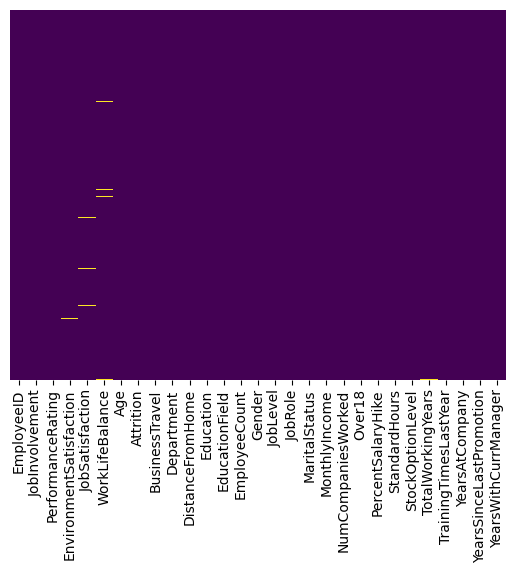

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [ ]:
dataset=df.copy()
dataset.isnull().any()

EmployeeID                 False
JobInvolvement             False
PerformanceRating          False
EnvironmentSatisfaction     True
JobSatisfaction             True
WorkLifeBalance             True
Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

# Data exploration

In [ ]:
dataset.describe().T

count          mean           std      min  \
EmployeeID               4410.0   2205.500000   1273.201673      1.0   
JobInvolvement           4410.0      2.729932      0.711400      1.0   
PerformanceRating        4410.0      3.153741      0.360742      3.0   
EnvironmentSatisfaction  4385.0      2.723603      1.092756      1.0   
JobSatisfaction          4390.0      2.728246      1.101253      1.0   
WorkLifeBalance          4372.0      2.761436      0.706245      1.0   
Age                      4410.0     36.923810      9.133301     18.0   
DistanceFromHome         4410.0      9.192517      8.105026      1.0   
Education                4410.0      2.912925      1.023933      1.0   
EmployeeCount            4410.0      1.000000      0.000000      1.0   
JobLevel                 4410.0      2.063946      1.106689      1.0   
MonthlyIncome            4410.0  65029.312925  47068.888559  10090.0   
NumCompaniesWorked       4391.0      2.694830      2.498887      0.0   
PercentSalaryHike        4410.0     15.209524      3.659108     11.0   
StandardHours            4410.0      8.000000      0.000000      8.0   
StockOptionLevel         4410.0      0.793878      0.851883      0.0   
TotalWorkingYears        4401.0     11.279936      7.782222      0.0   
TrainingTimesLastYear    4410.0      2.799320      1.288978      0.0   
YearsAtCompany           4410.0      7.008163      6.125135      0.0   
YearsSinceLastPromotion  4410.0      2.187755      3.221699      0.0   
YearsWithCurrManager     4410.0      4.123129      3.567327      0.0   

                              25%      50%       75%       max  
EmployeeID                1103.25   2205.5   3307.75    4410.0  
JobInvolvement               2.00      3.0      3.00       4.0  
PerformanceRating            3.00      3.0      3.00       4.0  
EnvironmentSatisfaction      2.00      3.0      4.00       4.0  
JobSatisfaction              2.00      3.0      4.00       4.0  
WorkLifeBalance              2.00      3.0      3.00       4.0  
Age                         30.00     36.0     43.00      60.0  
DistanceFromHome             2.00      7.0     14.00      29.0  
Education                    2.00      3.0      4.00       5.0  
EmployeeCount                1.00      1.0      1.00       1.0  
JobLevel                     1.00      2.0      3.00       5.0  
MonthlyIncome            29110.00  49190.0  83800.00  199990.0  
NumCompaniesWorked           1.00      2.0      4.00       9.0  
PercentSalaryHike           12.00     14.0     18.00      25.0  
StandardHours                8.00      8.0      8.00       8.0  
StockOptionLevel             0.00      1.0      1.00       3.0  
TotalWorkingYears            6.00     10.0     15.00      40.0  
TrainingTimesLastYear        2.00      3.0      3.00       6.0  
YearsAtCompany               3.00      5.0      9.00      40.0  
YearsSinceLastPromotion      0.00      1.0      3.00      15.0  
YearsWithCurrManager         2.00      3.0      7.00      17.0

In [ ]:
dataset.describe(include=object).T

count unique                     top  freq
Attrition       4410      2                      No  3699
BusinessTravel  4410      3           Travel_Rarely  3129
Department      4410      3  Research & Development  2883
EducationField  4410      6           Life Sciences  1818
Gender          4410      2                    Male  2646
JobRole         4410      9         Sales Executive   978
MaritalStatus   4410      3                 Married  2019
Over18          4410      1                       Y  4410

# Univariate analysis

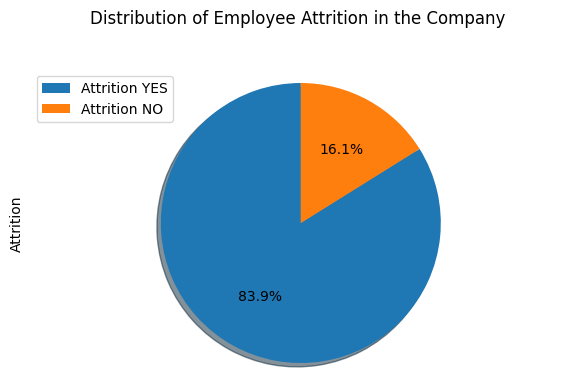

In [ ]:
labels = 'Attrition YES','Attrition NO'
df['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(7, 4),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Employee Attrition in the Company ', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper left') 
 # show plot
plt.show()

On constate que notre dataset est désiquilibré , car 84% des observations appartiennent à la classe No et seulement 16% qui appartiennent à la classe Yes et ce qui génére un désiquilibre entre les classes ,et c'est ce qui va impacter notre modéle et surprésenter la classe No.

Il faut trouver un moyen pour rééquilibrer notre dataset soit avec du oversampling ou undersampling .

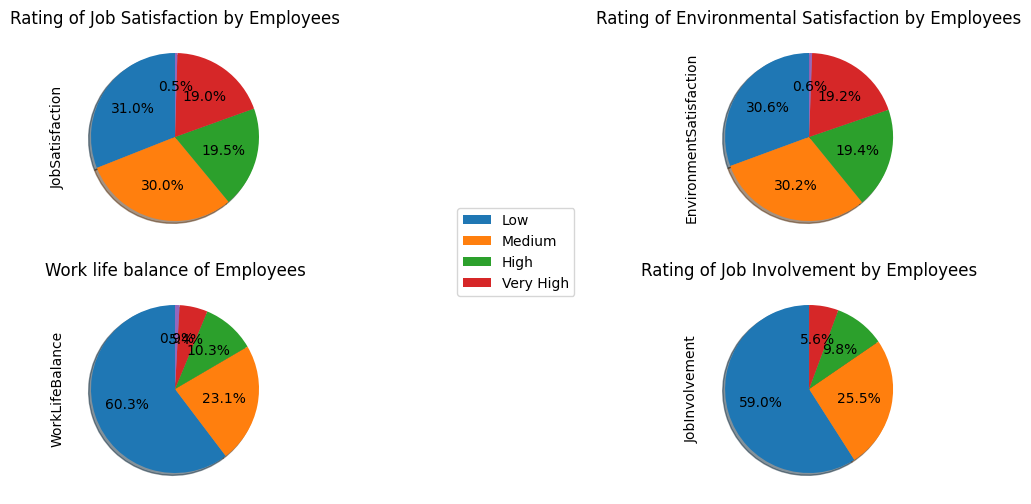

In [ ]:
fig = plt.figure() 

ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)  

labels = 'Low','Medium','High','Very High'

df['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

df['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

df['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Work life balance of Employees')

df['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

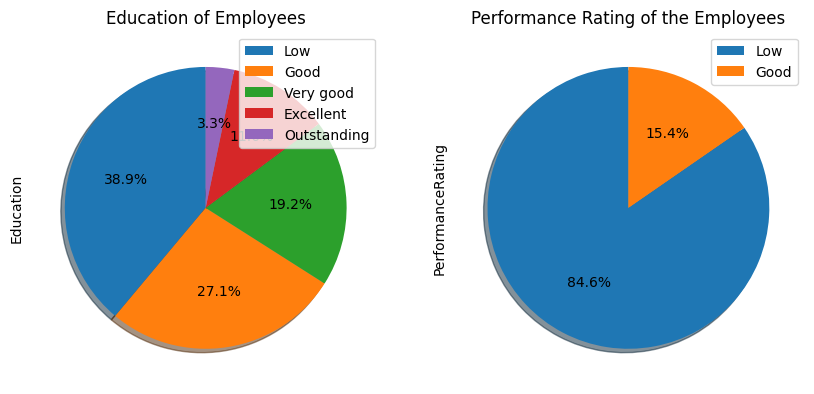

In [ ]:
fig2 = plt.figure() 

ax5 = fig2.add_subplot(121) 
ax6 = fig2.add_subplot(122)  
  
labels_list1 = 'Bad','Good','Better','Best' 
labels_list2 = 'Low','Good','Very good','Excellent','Outstanding'

df['Education'].astype(str).value_counts().plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax5) # add to subplot 2
ax5.set_title ('Education of Employees')
ax5.legend(labels=labels_list2,loc='upper right')

df['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax6) 
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')

plt.show()

# Bivariate analysis

[None, None, None, None, None, None, None, None, None]

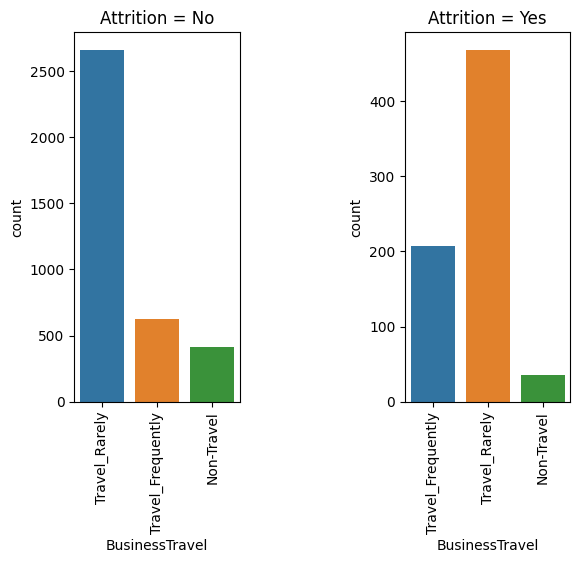

In [ ]:
# Attrition by Business Travel

df_attrition_y = df[df['Attrition']=='Yes']
df_attrition_n = df[df['Attrition']=='No']
fig, ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
sns.countplot(data=df_attrition_n,x='BusinessTravel', ax=ax[0])
ax[0].set_title('Attrition = No')
plt.setp(ax[0].get_xticklabels(), rotation=90, ha="center")
sns.countplot(data=df_attrition_y ,x='BusinessTravel', ax=ax[1])
ax[1].set_title('Attrition = Yes')
plt.setp(ax[1].get_xticklabels(), rotation=90, ha="center")

[None, None, None, None, None, None, None, None, None]

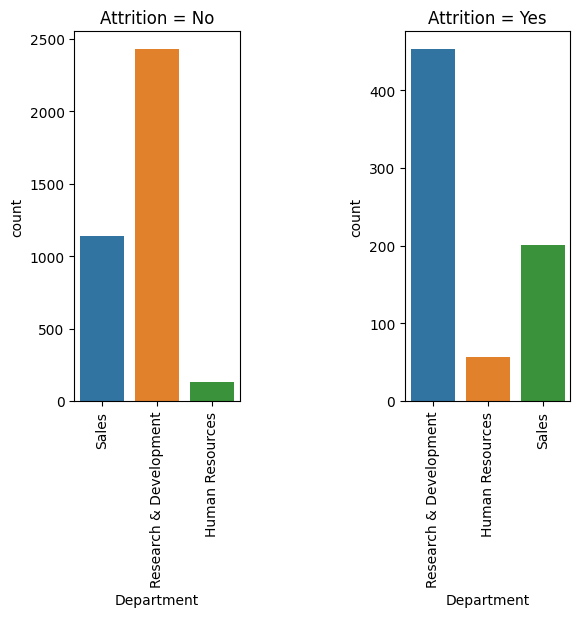

In [ ]:
fig, ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
sns.countplot(data=df_attrition_n,x='Department', ax=ax[0])
ax[0].set_title('Attrition = No')
plt.setp(ax[0].get_xticklabels(), rotation=90, ha="center")
sns.countplot(data=df_attrition_y,x='Department', ax=ax[1])
ax[1].set_title('Attrition = Yes')
plt.setp(ax[1].get_xticklabels(), rotation=90, ha="center")

[None, None, None, None, None, None]

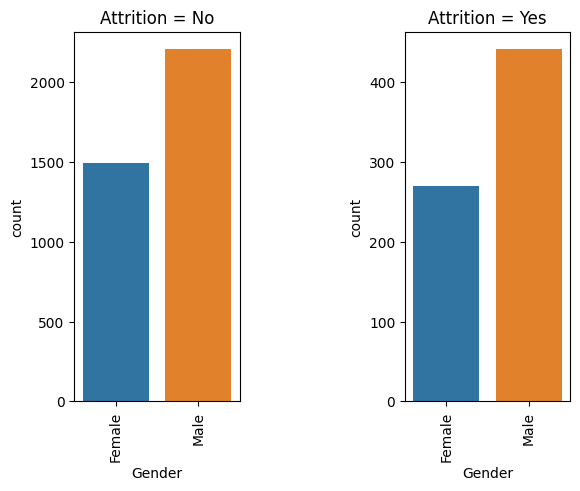

In [ ]:
fig, ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
sns.countplot(data=df_attrition_n,x='Gender', ax=ax[0])
ax[0].set_title('Attrition = No')
plt.setp(ax[0].get_xticklabels(), rotation=90, ha="center")
sns.countplot(data=df_attrition_y,x='Gender', ax=ax[1])
ax[1].set_title('Attrition = Yes')
plt.setp(ax[1].get_xticklabels(), rotation=90, ha="center")

[None, None, None, None, None, None]

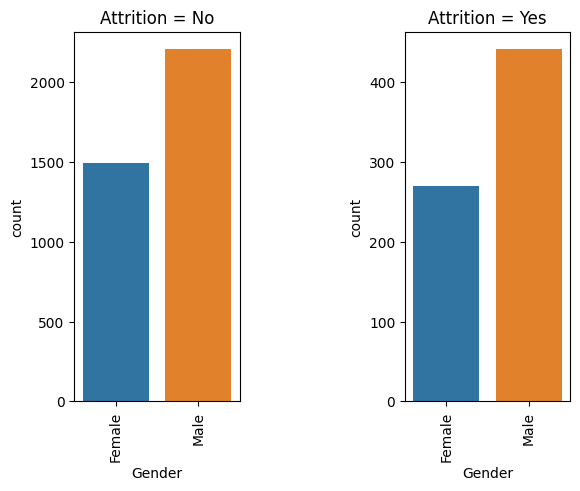

In [ ]:
fig, ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
sns.countplot(data=df_attrition_n,x='Gender', ax=ax[0])
ax[0].set_title('Attrition = No')
plt.setp(ax[0].get_xticklabels(), rotation=90, ha="center")
sns.countplot(data=df_attrition_y,x='Gender', ax=ax[1])
ax[1].set_title('Attrition = Yes')
plt.setp(ax[1].get_xticklabels(), rotation=90, ha="center")

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

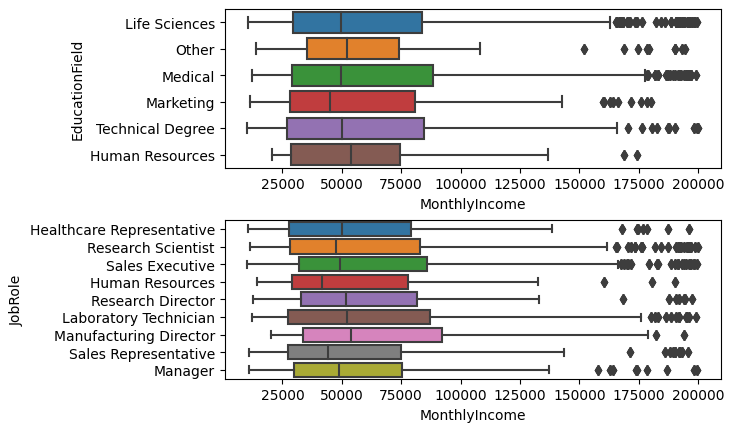

In [ ]:
fig, ax = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.33)

sns.boxplot(x='MonthlyIncome', y='EducationField', data=df, ax=ax[0])
sns.boxplot(x='MonthlyIncome', y='JobRole', data=df, ax=ax[1])

Le salaire médian le plus faible se trouve chez les employés du secteur ressources humaines .

Nous constatons qy'il n'existe pas une grande différence de variabilité ou de médiane ni de distribution entre les roles .Les médianes sont proches les unes des autres .

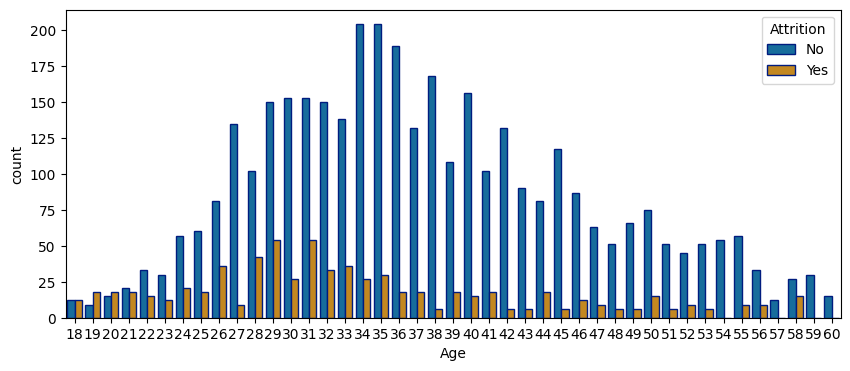

In [ ]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Age', hue='Attrition', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

Comme la moyenne est presque approximativement similaire à la médiane, la répartition de l'âge des employés est approximativement normale avec une moyenne d'âge de 35 ans.

La proportion d'employés qui ont quitté était comparativement moindre parmi les employés senior. Peut-être que ces employés étaient à une autorité supérieure et étaient moins susceptibles de quitter ce poste.

Suivent les employés à mi-carrière, les niveaux d'attrition parmi les employés les plus récents et les moins expérimentés semblent être les plus élevés. Ces salariés sont peut-être partis pour des offres plus lucratives ou des études supérieures.

Une attrition majeure s'est produite parmi les employés à mi-carrière. Le changement de carrière et la croissance de carrière pourraient être l'une des possibilités d'un tel niveau d'attrition.

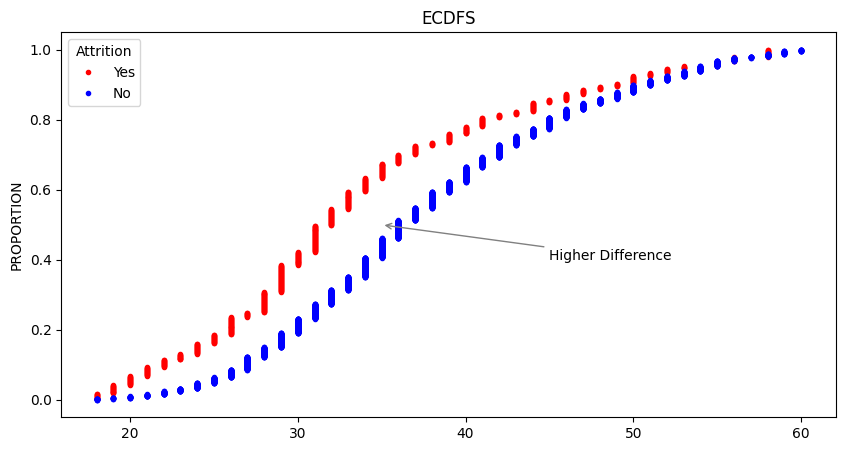

In [ ]:
def ecdf(data):
    
    y = (np.arange(1, len(data) + 1))/len(data)
    x = np.sort(data)
    return x,y

# PLotting the ECDFS

x_yes, y_yes = ecdf(df[df['Attrition']=='Yes'].Age)
x_no, y_no = ecdf(df[df['Attrition']=='No'].Age)
plt.figure(figsize=(10,5))
plt.plot(x_yes, y_yes, linestyle = 'none', marker = '.', color = 'r')
plt.plot(x_no, y_no, linestyle = 'none', marker = '.', color = 'b')
plt.ylabel('PROPORTION')
plt.title('ECDFS')
plt.legend(['Yes','No'], title = 'Attrition')

plt.annotate('Higher Difference',
             xy = (35, 0.5),
             xytext = (45, 0.4),
             arrowprops = {'arrowstyle':'->', 'color':'gray'});

L'âge des employés varie entre 18 et 60 ans, ce qui semble être intuitivement vrai car l'âge de travail sans restriction commence principalement entre 18 et 60 ans. De plus, il n'y a pas de valeurs aberrantes présentes dans les données.

Pour chaque âge, la fraction des personnes en dessous de cet âge qui ont quitté l'entreprise est supérieure à la fraction des personnes en dessous du même âge travaillant dans l'entreprise.

Les employés quittants l'entreprise semblent être plus jeunes que l'autre groupe,nous pouvons clairement voir où se situent réellement les différences.

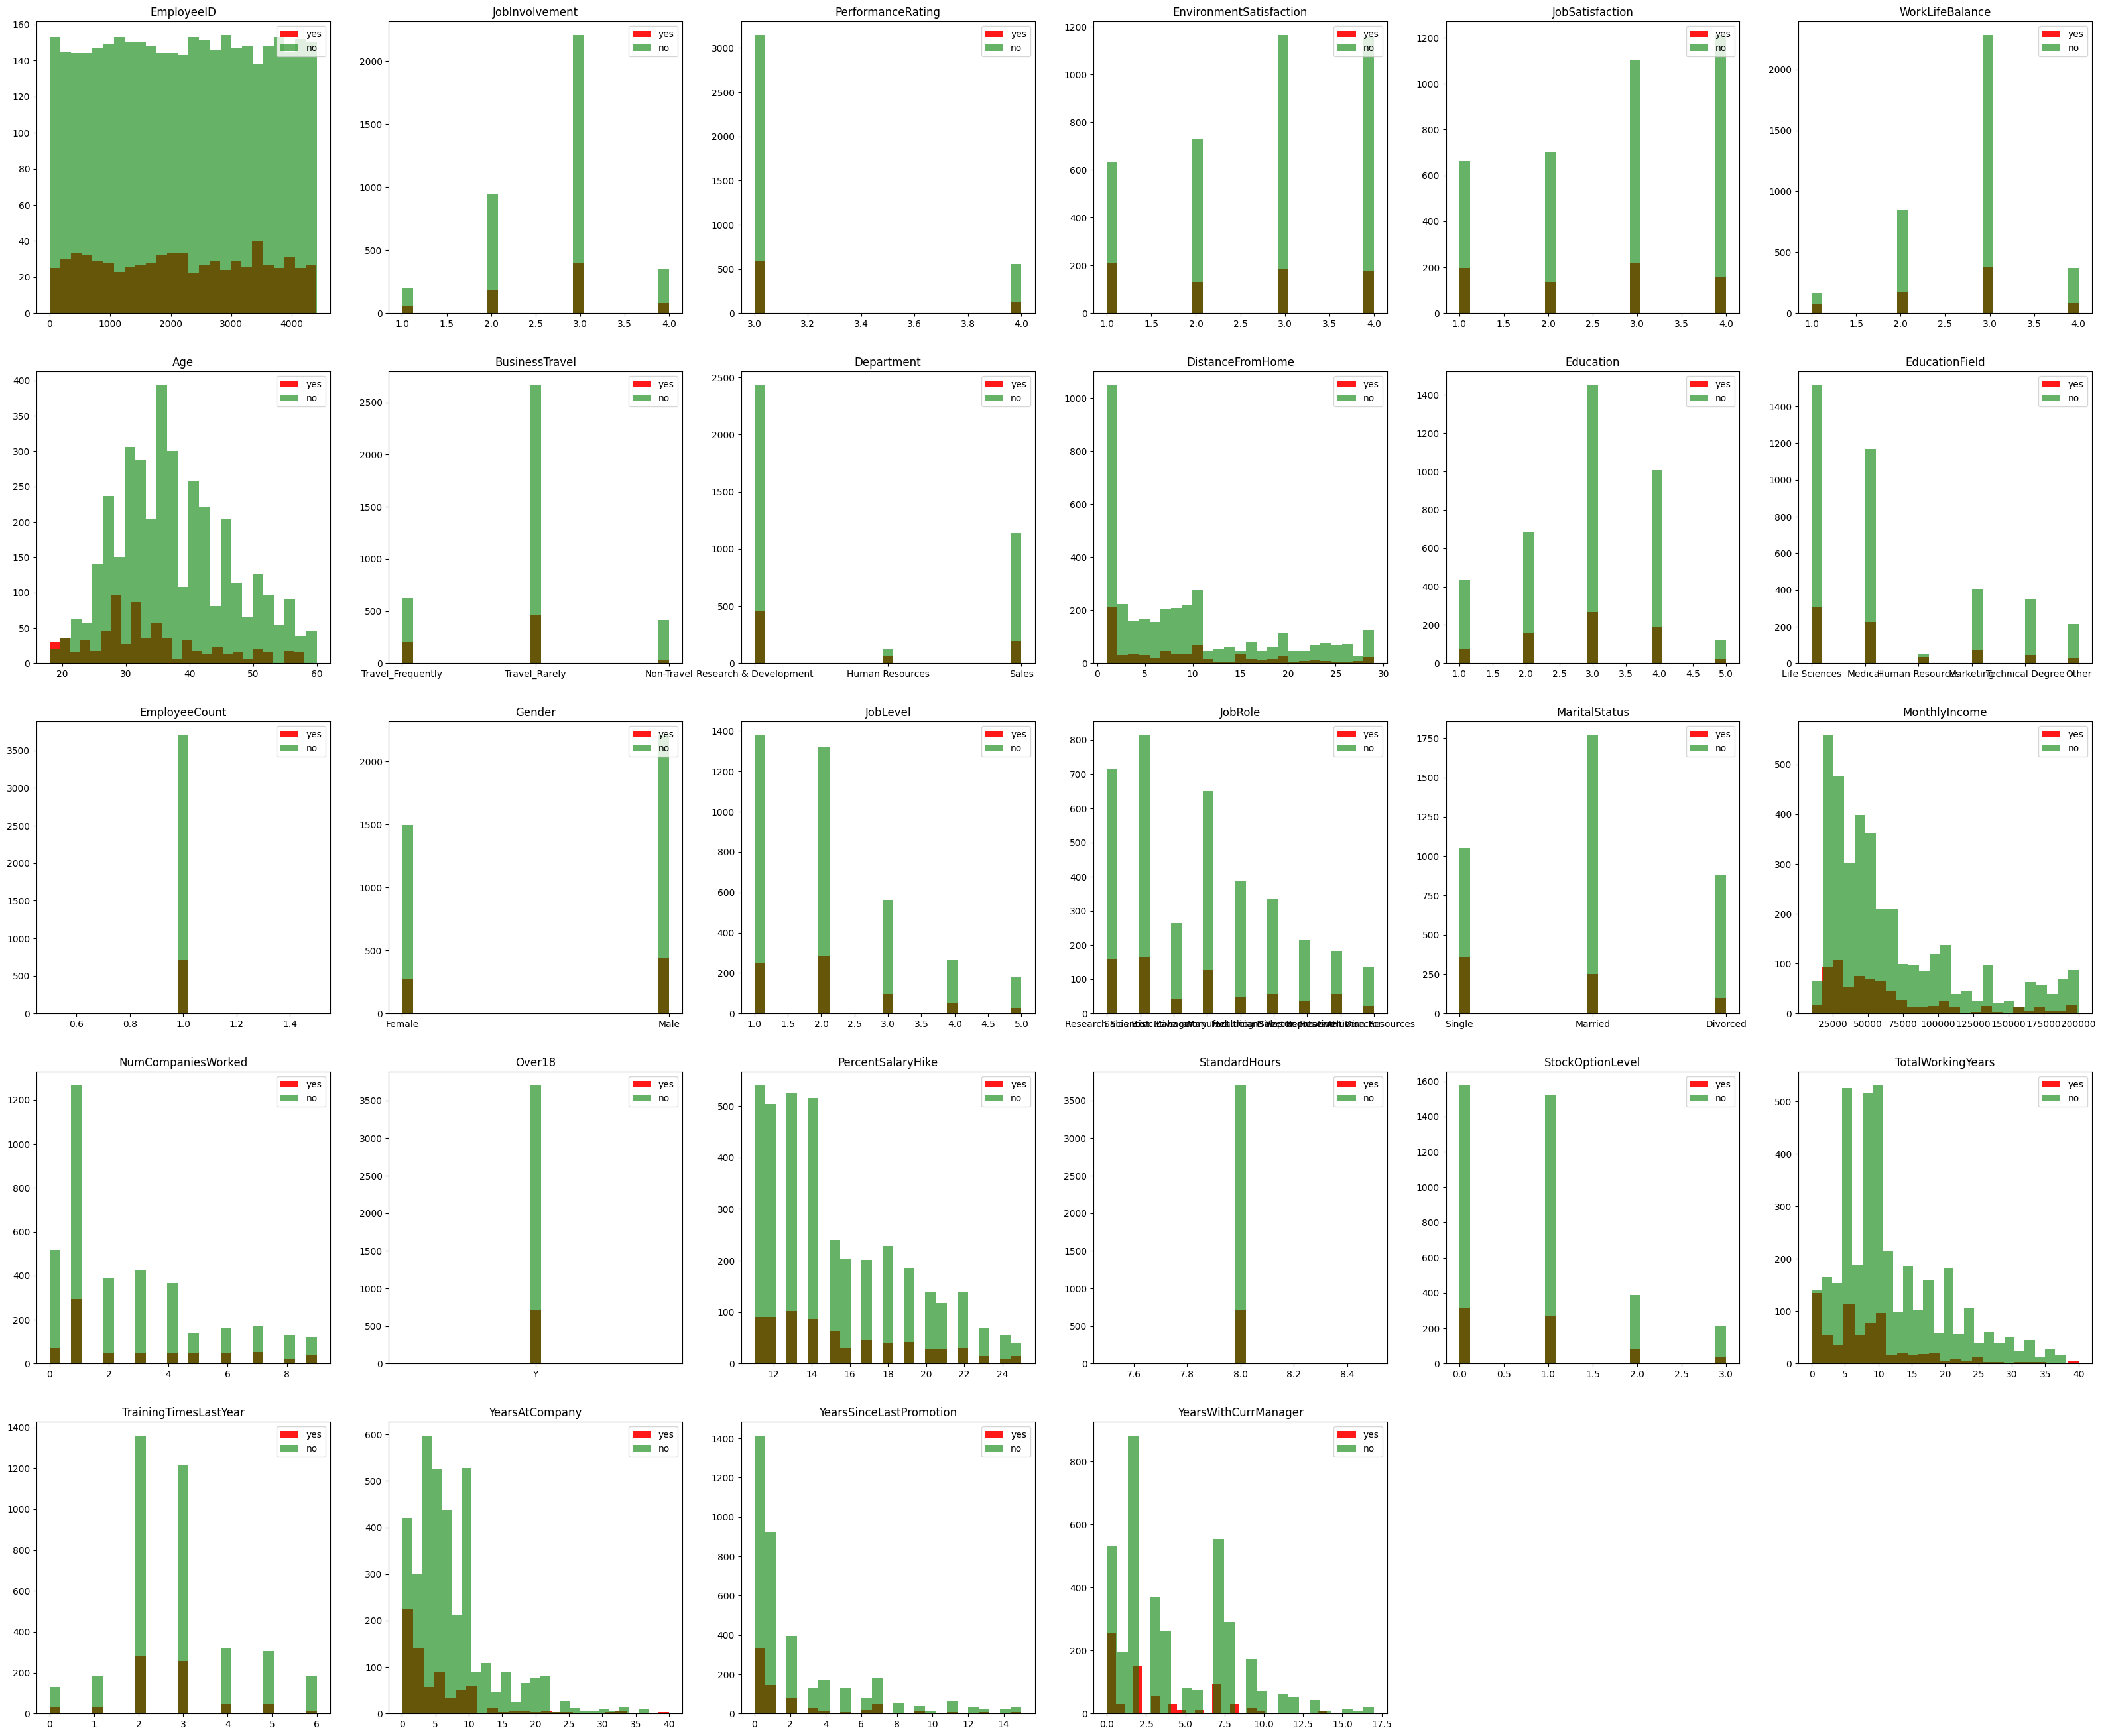

In [ ]:
#plot distributions
k=1
plt.figure(figsize=(40, 40))
for col in df:
  if col=="Attrition":
    continue
  yes = df[df['Attrition'] == 'Yes'][col]
  no = df[df['Attrition'] == 'No'][col]
  plt.subplot(6, 6, k)
  plt.hist(yes, bins=25, alpha=0.9, label='yes', color='r')
  plt.hist(no, bins=25, alpha=0.6, label='no', color='g')
  plt.legend(loc='upper right')
  plt.title(col)
  k+=1

Text(0.5, 1.0, 'NumCompaniesWorked')

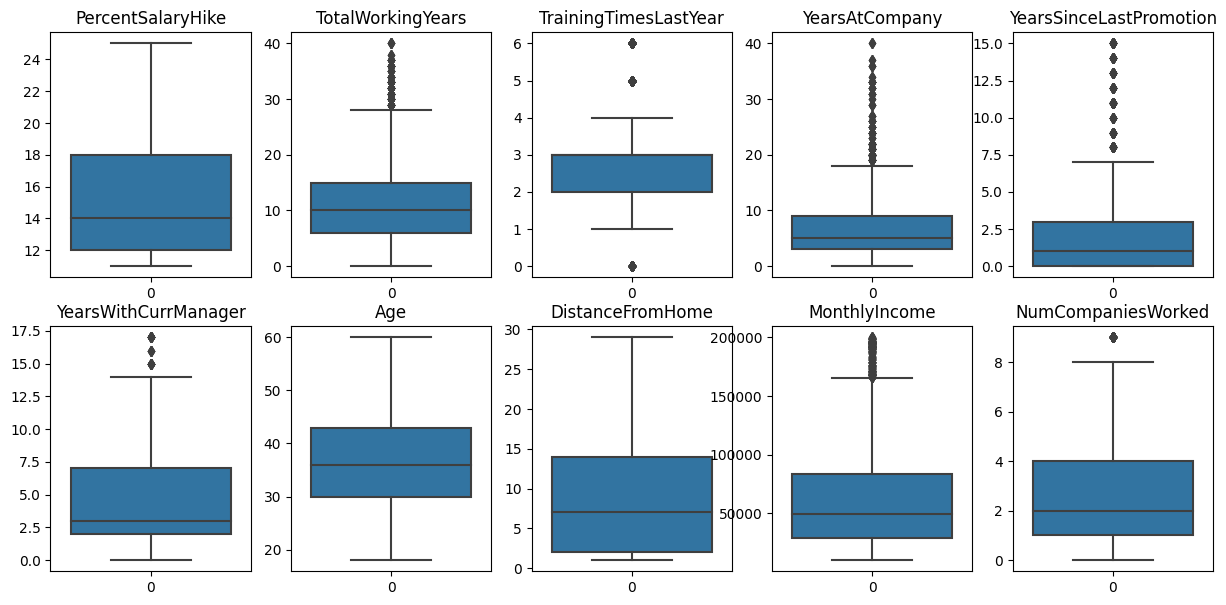

In [ ]:
f, ax = plt.subplots(2,5,figsize = (15,7))
dataset=df.copy()
sns.boxplot(data = dataset['PercentSalaryHike'],ax = ax[0][0]).set_title('PercentSalaryHike')
sns.boxplot(data = dataset['TotalWorkingYears'],ax = ax[0][1]).set_title('TotalWorkingYears')
sns.boxplot(data = dataset['TrainingTimesLastYear'], ax = ax[0][2]).set_title('TrainingTimesLastYear')
sns.boxplot(data = dataset['YearsAtCompany'],ax = ax[0][3]).set_title('YearsAtCompany')
sns.boxplot(data = dataset['YearsSinceLastPromotion'],ax = ax[0][4]).set_title('YearsSinceLastPromotion')
sns.boxplot(data = dataset['YearsWithCurrManager'],ax = ax[1][0]).set_title('YearsWithCurrManager')
sns.boxplot(data = dataset['Age'],ax = ax[1][1]).set_title('Age')
sns.boxplot(data = dataset['DistanceFromHome'],ax = ax[1][2]).set_title('DistanceFromHome')
sns.boxplot(data = dataset['MonthlyIncome'],ax = ax[1][3]).set_title('MonthlyIncome')
sns.boxplot(data = dataset['NumCompaniesWorked'],ax = ax[1][4]).set_title('NumCompaniesWorked')

Nous remarquons qu'il existe énormément de valeurs abérrantes dans les variables MonthlyIncome ,YearsAtCompany et totalWorkingYears ======>A traiter les valeurs abérrantes dans les prochaines sections

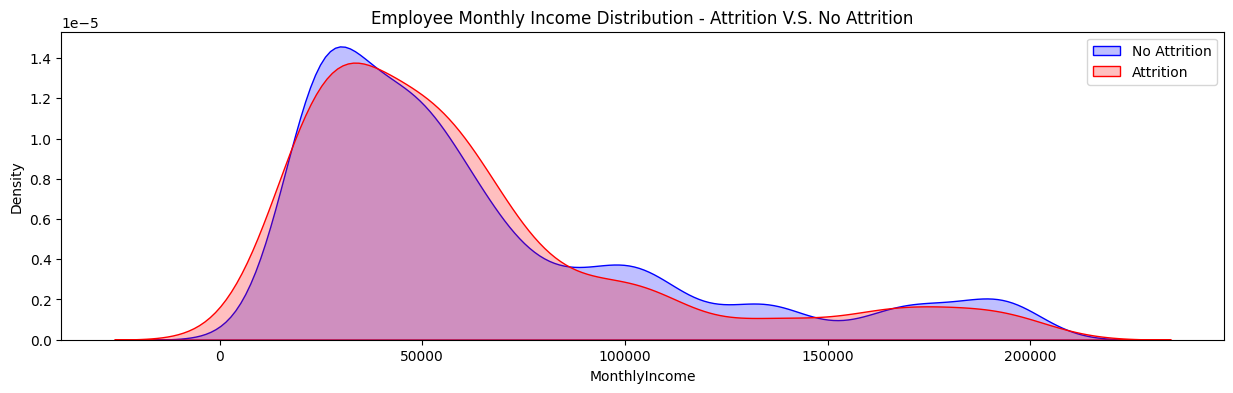

In [ ]:
# Plotting Monthly Income and Attrition
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 'No'),'MonthlyIncome'] , color='b',shade=True, label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 'Yes'),'MonthlyIncome'] , color='r',shade=True, label='Attrition')
plt.title('Employee Monthly Income Distribution - Attrition V.S. No Attrition')
plt.legend();

Pas de grandes différences de distribution des salaires entre les employés qui sont partis et ceux qui sont restés ,cependant le salaire moyen des employés qui ne quittent pas l'entreprise est un petit peu plus élévé par rapport a ceux qui quittent ====>Le salaire peut etre un facteur important pour la prédiction de l'attrition (variable explicative)

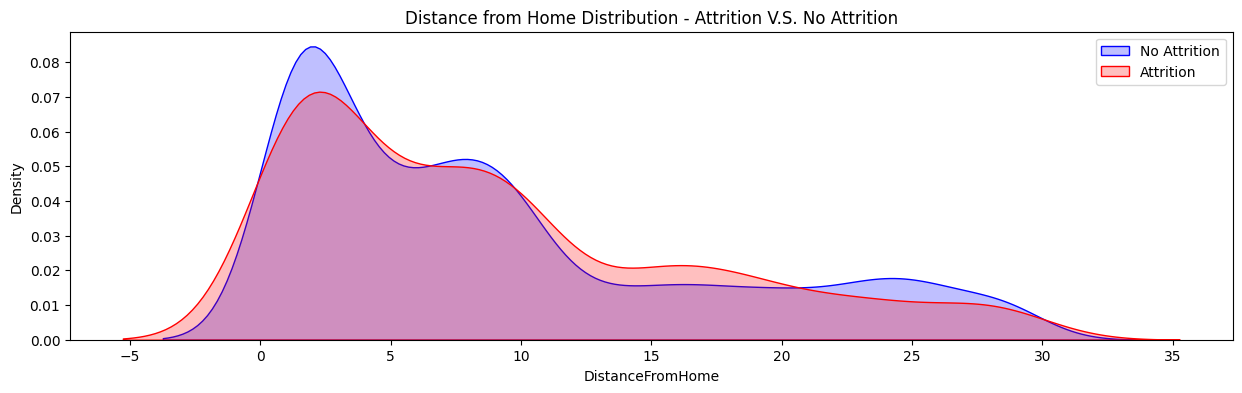

In [ ]:
# Plotting Monthly Income and Attrition
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 'No'),'DistanceFromHome'] , color='b',shade=True, label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 'Yes'),'DistanceFromHome'] , color='r',shade=True, label='Attrition')
plt.title('Distance from Home Distribution - Attrition V.S. No Attrition')
plt.legend();

# Constants variables

In [ ]:
#Remove the column EmployeeNumber
df = df.drop('EmployeeID', axis = 1)
#Remove the column StandardHours
df = df.drop('StandardHours', axis = 1) 
#Remove the column EmployeeCount
df = df.drop('EmployeeCount', axis = 1) 
#Remove the column EmployeeCount
df = df.drop('Over18', axis = 1) #Contains only the value 'Yes'

Les colonnes StandardHours , Over18 & EmployeeCount contiennent une seule valeur dans chaque ligne, de sorte que ces colonnes n'ajouteront aucune information supplémentaire au modèle. Nous supprimerons ces colonnes de l'ensemble de données.

# Correlations

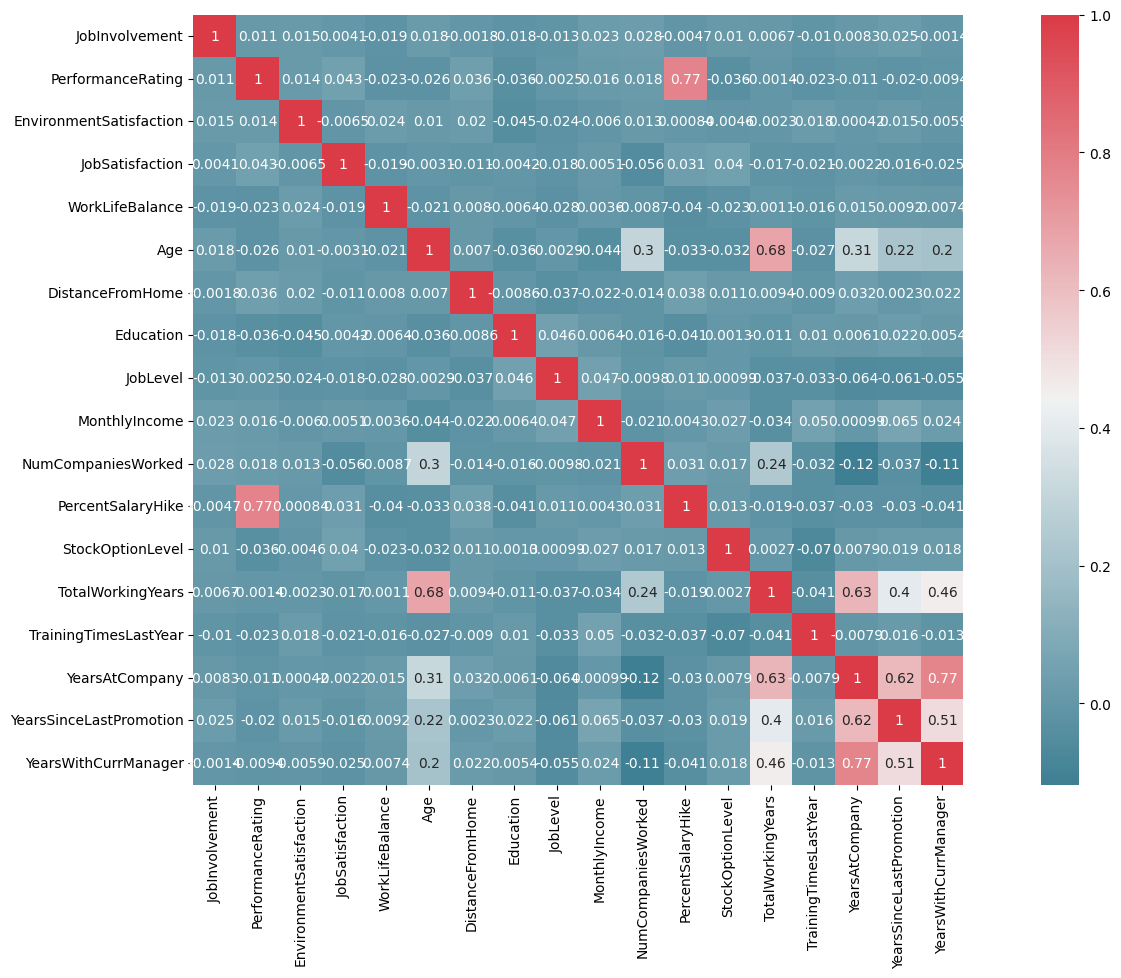

In [ ]:
# Plotting the correlation matrix
f, ax = plt.subplots(figsize=(20,10))
data= df.fillna(df.mean())
corr = data.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),square = True,ax=ax,annot=True);

L'âge est corrélé positivement avec le nombre total d'heures de travail.

Le taux de performance est également corrélé positivement avec l'augmentation de salaire.

Des variables telles que TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion et YearsWithCurrentManager sont étroitement corrélées les unes aux autres. Cela peut éventuellement conduire à une multicolinéarité dans le contexte de la modélisation par régression.

In [ ]:
df.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack()

Attrition                         No        Yes
JobRole                                        
Healthcare Representative   8.714286   9.052632
Human Resources             8.955556  11.285714
Laboratory Technician      10.322581   9.000000
Manager                     7.954545   8.571429
Manufacturing Director      9.379845   7.750000
Research Director           8.786885   9.947368
Research Scientist          8.899582  10.301887
Sales Executive             9.391144   7.090909
Sales Representative        9.014085  11.500000

Parmi les employés occupant divers postes, la distance moyenne entre le travail et le domicile pour les employés des représentants de la santé, les employés des ressources humaines, les gestionnaires et les cadres commerciaux qui ont quitté l'entreprise est supérieure à la distance moyenne entre le travail et le domicile pour les employés qui ne sont pas partis .

# Detecting and fixing outliers

La méthode Z_score consiste à:

-Parcourir tous les points de données et calculer le score Z à l'aide de la formule (Xi-mean)/std.

-Définir une valeur seuil et marquer les points de données dont la valeur absolue du score Z est supérieure au seuil comme valeurs aberrantes.

Le principe de la méthode  IQR: les points de données qui se situent 1,5*l'IQR au-dessus de Q3 et en dessous de Q1 sont des valeurs aberrantes.

La méthode de fixation des outliers :dans cette technique, la valeur aberrante est plafonnée à une certaine valeur au-dessus de la valeur du 90e centile ou plafonnée à un facteur inférieur à la valeur du 10e centile.



In [ ]:
def fixoutliers(x):
    xColumnNames=x.columns
    s=0
    for j in xColumnNames:
        try:
            xy=x[j]    
            mydata=pd.DataFrame()
            updated=[]
            Q1,Q3=np.percentile(xy,[25,75])
            IQR=Q3-Q1
            minimum=Q1-1.5*IQR
            maximum=Q3+1.5*IQR
            for i in xy:
                if(i>maximum):
                    s=s+1
                    i=maximum
                    updated.append(i)
                elif(i<minimum):
                    s=s+1
                    i=minimum
                    updated.append(i)
                else:
                    updated.append(i)
            x[j]=updated
        except:
            continue
    return x

def detect_outliers_zscore(data):
    outliers = []
    thres = 2
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [ ]:
res=df.copy()
l=res.select_dtypes(include=np.number).columns.tolist()
print("=================================================")
print("Détection des outliers suivant la méthode Z-score")
print("==================================================")
for elem in l:
    sample_outliers = detect_outliers_zscore(res[elem])
    print("Nombre d'outliers dans la variable  "+ str(elem)+": ", len(sample_outliers))
    print("------------------------------------------------------")

Détection des outliers suivant la méthode Z-score
Nombre d'outliers dans la variable  JobInvolvement:  249
------------------------------------------------------
Nombre d'outliers dans la variable  PerformanceRating:  678
------------------------------------------------------
Nombre d'outliers dans la variable  EnvironmentSatisfaction:  0
------------------------------------------------------
Nombre d'outliers dans la variable  JobSatisfaction:  0
------------------------------------------------------
Nombre d'outliers dans la variable  WorkLifeBalance:  239
------------------------------------------------------
Nombre d'outliers dans la variable  Age:  165
------------------------------------------------------
Nombre d'outliers dans la variable  DistanceFromHome:  261
------------------------------------------------------
Nombre d'outliers dans la variable  Education:  144
------------------------------------------------------
Nombre d'outliers dans la variable  JobLevel:  207
-------

In [ ]:
res=df.copy()
l=res.select_dtypes(include=np.number).columns.tolist()
print("=================================================")
print("Détection des outliers suivant la méthode IQR method")
print("==================================================")
for elem in l:
    sample_outliers = detect_outliers_iqr(res[elem])
    print("Nombre d'outliers dans la variable  "+ str(elem)+": ", len(sample_outliers))
    print("------------------------------------------------------")

Détection des outliers suivant la méthode IQR method
Nombre d'outliers dans la variable  JobInvolvement:  0
------------------------------------------------------
Nombre d'outliers dans la variable  PerformanceRating:  678
------------------------------------------------------
Nombre d'outliers dans la variable  EnvironmentSatisfaction:  0
------------------------------------------------------
Nombre d'outliers dans la variable  JobSatisfaction:  0
------------------------------------------------------
Nombre d'outliers dans la variable  WorkLifeBalance:  0
------------------------------------------------------
Nombre d'outliers dans la variable  Age:  0
------------------------------------------------------
Nombre d'outliers dans la variable  DistanceFromHome:  0
------------------------------------------------------
Nombre d'outliers dans la variable  Education:  0
------------------------------------------------------
Nombre d'outliers dans la variable  JobLevel:  0
----------------

In [ ]:
df=fixoutliers(df)

# Encoding and dummification of categorical features

In [ ]:
data=pd.get_dummies(data, drop_first=True)
target_data = data[['Attrition_Yes']]
input_data = data.drop(['Attrition_Yes'], axis=1)
col_values = list(input_data.columns.values)

# Detection of multi colinearity

Le score VIF d'une variable indépendante représente la façon dont la variable est expliquée par d'autres variables indépendantes.

In [ ]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

calculate_vif(input_data,input_data.columns)

VIF  Tolerance
JobInvolvement                      1.018769   0.981577
PerformanceRating                   2.548676   0.392361
EnvironmentSatisfaction             1.011455   0.988674
JobSatisfaction                     1.021817   0.978649
WorkLifeBalance                     1.017744   0.982565
Age                                 2.038009   0.490675
DistanceFromHome                    1.020282   0.980122
Education                           1.025979   0.974679
JobLevel                            1.028771   0.972034
MonthlyIncome                       1.033502   0.967584
NumCompaniesWorked                  1.265322   0.790313
PercentSalaryHike                   2.561426   0.390407
StockOptionLevel                    1.037518   0.963839
TotalWorkingYears                   3.112931   0.321241
TrainingTimesLastYear               1.028827   0.971981
YearsAtCompany                      3.990617   0.250588
YearsSinceLastPromotion             1.663662   0.601084
YearsWithCurrManager                2.527903   0.395585
BusinessTravel_Travel_Frequently    2.360745   0.423595
BusinessTravel_Travel_Rarely        2.372639   0.421472
Department_Research & Development   9.852624   0.101496
Department_Sales                    9.955771   0.100444
EducationField_Life Sciences       23.934490   0.041781
EducationField_Marketing           10.808866   0.092517
EducationField_Medical             21.508113   0.046494
EducationField_Other                5.997757   0.166729
EducationField_Technical Degree     8.794613   0.113706
Gender_Male                         1.027423   0.973309
JobRole_Human Resources             1.368921   0.730502
JobRole_Laboratory Technician       2.497216   0.400446
JobRole_Manager                     1.694916   0.590000
JobRole_Manufacturing Director      1.920428   0.520717
JobRole_Research Director           1.552378   0.644173
JobRole_Research Scientist          2.634281   0.379610
JobRole_Sales Executive             2.761291   0.362149
JobRole_Sales Representative        1.563029   0.639783
MaritalStatus_Married               1.699893   0.588272
MaritalStatus_Single                1.711266   0.584363

Nous constatons que les varaibles EducationField_Technical Degree,EducationField_Other,EducationField_Marketing,EducationField_Life Sciences,EducationField_Medical,Department_Sales,Department_Research & Development sont colinéiares car elles ont des valeurs VIF trés grandes (supérieures à 5)

Il faut procéder à les supprimer!!

In [ ]:
data=data.drop(['EducationField_Technical Degree','EducationField_Other','EducationField_Marketing','EducationField_Life Sciences','EducationField_Medical','Department_Sales','Department_Research & Development'],axis=1)

# Tests statistiques 

Test du chi carré est appliqué pour tester l'indépendance de deux événements. Cette méthode est utilisée pour évaluer la probabilité de corrélation ou d'association entre les caractéristiques à l'aide de leur distribution de fréquence.

In [ ]:
#gives top 10 features having maximum chi-square value
feature_scores = chi2(input_data, target_data)[0]
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:10]:
    print(fname, score)

MonthlyIncome 145998.18407666282
TotalWorkingYears 683.6281521919634
YearsAtCompany 426.30016290974777
YearsWithCurrManager 332.0146016957201
Age 252.46583043004608
MaritalStatus_Single 92.31500685105203
BusinessTravel_Travel_Frequently 47.44986826090046
YearsSinceLastPromotion 22.80517041972984
JobSatisfaction 20.595045341906886
EnvironmentSatisfaction 19.917215067682825


D'aprés le résultat de chi2 , l'attrition des employée est basée principalement sur leur salaires .

L'information mutuelle mesure la dépendance d'une variable à une autre. Si,

L'information mutuelle est 0, alors la variable X ne contient aucune information sur la variable Y. X et Y sont indépendants.

L'information mutuelle est 1, alors la variable X peut être déterminée à partir de la variable Y. X et Y sont dépendants.

In [ ]:
#gives top 10 features having maximum mutual information value
feature_scores = mutual_info_classif(input_data, target_data)
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:10]:
    print(fname, score)

MonthlyIncome 0.09160725266620551
Age 0.036337923614929046
TotalWorkingYears 0.03389237569665737
YearsWithCurrManager 0.02860280305888452
YearsAtCompany 0.023830480032574375
DistanceFromHome 0.02057373029493048
NumCompaniesWorked 0.013013272827302913
JobRole_Research Director 0.012163104277943981
MaritalStatus_Married 0.01168376777832747
YearsSinceLastPromotion 0.011394459825383452


D'aprés le résultat de l'information mututelle,l'attrition des employée se base sur leur salaire et leur age

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import chi2, f_regression
# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(score_func=chi2, k=5)
chi2_selector.fit(input_data, target_data)

# Look at scores returned from the selector for each feature
chi2_scores = pd.DataFrame(list(zip(input_data.columns, chi2_selector.scores_, chi2_selector.pvalues_)), columns=['ftr', 'score', 'pval'])
chi2_scores

# you can see that the kbest returned from SelectKBest 
#+ were the two features with the _highest_ score
kbest = np.asarray(input_data.columns)[chi2_selector.get_support()]
print("Les 5 vriables les plus significatives par rapport a la variabe Attrition sont :",kbest.tolist())

Les 5 vriables les plus significatives par rapport a la variabe Attrition sont : ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']


In [ ]:
data['HolisticSatisfaction'] = data['EnvironmentSatisfaction'] + data['JobInvolvement'] + data['JobSatisfaction'] 
data=data.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction'],axis = 1)
#Nous supprimons ces variables car elles sont fortement corrélées avec la variable YearsAtCompany
data=data.drop(['YearsWithCurrManager','YearsSinceLastPromotion'],axis = 1)
#Nous supprimons cette variable car elle est fortement corrélée avec la variable PercentSalaryHike
data = data.drop('PerformanceRating', axis = 1) 

In [ ]:
Y = data['Attrition_Yes']
X = data.drop('Attrition_Yes',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaled = X.copy()

col_names = ['Age', 'DistanceFromHome', 'MonthlyIncome',  'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany']

features = X_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X_scaled[col_names] = features
X=X_scaled

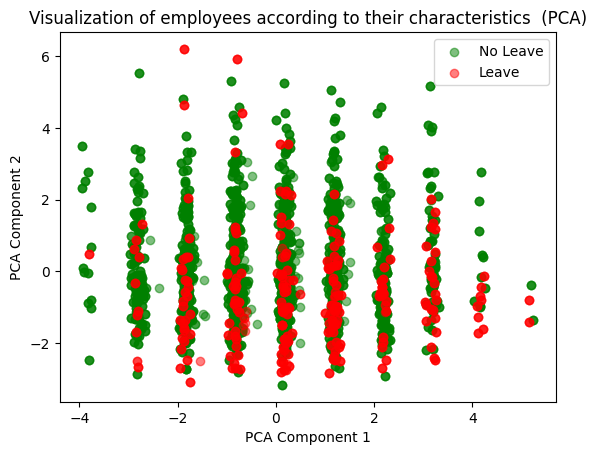

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
respca = pca.fit_transform(X)
respcadf = pd.DataFrame(respca, index=df.index)
plt.scatter(respcadf[df["Attrition"]=='No'].iloc[:,0], respcadf[df["Attrition"]=='No'].iloc[:,1], c="green",alpha=0.5, label="No Leave")
plt.scatter(respcadf[df["Attrition"]=='Yes'].iloc[:,0], respcadf[df["Attrition"]=='Yes'].iloc[:,1], c="red",alpha=0.5, label="Leave")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualization of employees according to their characteristics  (PCA)")
plt.legend()
plt.show()

Variances (Percentage):
[17.99515098 13.36797086  7.76346406  7.19760773  6.59129927  6.39601225
  6.14311162  5.9238435   5.72085587  4.40461702]

Top 4 most important features in each component
Component 0: ['HolisticSatisfaction', 'Education', 'JobLevel', 'StockOptionLevel']
Component 1: ['TotalWorkingYears', 'Age', 'YearsAtCompany', 'NumCompaniesWorked']
Component 2: ['JobLevel', 'NumCompaniesWorked', 'DistanceFromHome', 'Education']
Component 3: ['NumCompaniesWorked', 'YearsAtCompany', 'Education', 'PercentSalaryHike']
Component 4: ['PercentSalaryHike', 'DistanceFromHome', 'TrainingTimesLastYear', 'NumCompaniesWorked']
Component 5: ['Education', 'MonthlyIncome', 'TrainingTimesLastYear', 'PercentSalaryHike']
Component 6: ['DistanceFromHome', 'Education', 'PercentSalaryHike', 'MonthlyIncome']
Component 7: ['DistanceFromHome', 'MonthlyIncome', 'TrainingTimesLastYear', 'PercentSalaryHike']
Component 8: ['PercentSalaryHike', 'MonthlyIncome', 'TrainingTimesLastYear', 'DistanceFromHome']

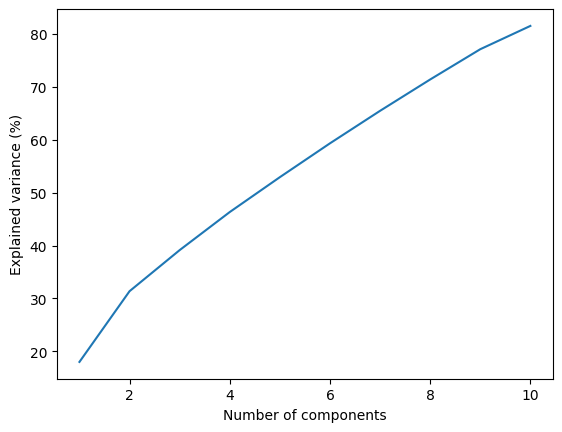

In [ ]:
pd.DataFrame({"Noms des variables" : X.columns, "Composante 1" : pca.components_[0], "Composante 2" : pca.components_[1],"Composante 3" : pca.components_[2]})
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()
# plot a scree plot
components = len(pca.explained_variance_ratio_)
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
pca_components = abs(pca.components_)
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {X.columns[indices].to_list()}')

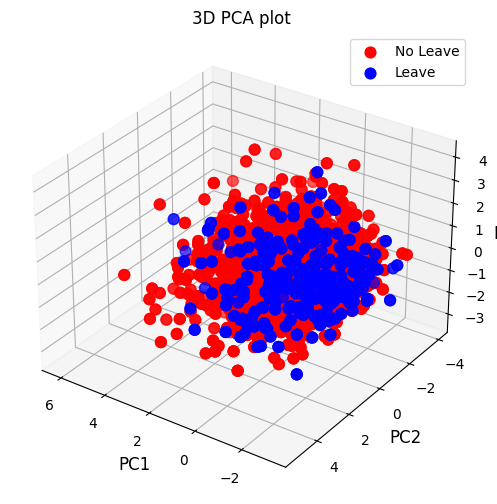

In [ ]:
Xax = respca[:,1]
Yax = respca[:,0]
Zax = respca[:,3]
cdict = {0:'r',1:'b',2:'r'}
label = {0:'No Leave',1:'Leave'}
y=Y
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, 
                     projection='3d')
 
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], 
            Yax[ix], 
            Zax[ix], 
            c=cdict[l], 
            s=60,
           label=label[l])
 
ax.set_xlabel("PC1", 
              fontsize=12)
ax.set_ylabel("PC2", 
              fontsize=12)
ax.set_zlabel("PC3", 
              fontsize=12)
 
ax.view_init(30, 125)
ax.legend()
plt.title("3D PCA plot")
plt.show()

In [ ]:
train_accuracy = []
test_accuracy = []
models = ['Logistic Regression','SVM without kernel','SVM with linear kernel','SVM with sigmoid kernel','KNN','Decision Tree','Neural Perceptron']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0,stratify=y)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

def train_test_error(y_train,y_test):
      train_error =((y_train==Y_train).sum())/len(y_train)*100
      test_error =((y_test==Y_test).sum())/len(Y_test)*100
      train_accuracy.append(train_error)
      test_accuracy.append(test_error)

In [ ]:
def plot_auc(model,train_proba,train_predict,test_proba,test_predict):
    train_test_error(train_predict , test_predict)
    fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, test_proba[:, 0])
    fpr2,tpr2,thresholds2 = metrics.roc_curve(Y_train,train_proba[:, 0])
    print_score(model, X_train, Y_train, X_test, Y_test, train=True)
    print_score(model, X_train, Y_train, X_test, Y_test, train=False)
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_auc_score
    x = plt.subplot( )
    x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(Y_test,test_predict)))
    x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(Y_train,train_predict)))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    x.legend()
    plt.show()
    class_names = ['Predicted positive','Predicted negative']
    class_names1 = ['Actually positive','Actually negative']
    df_heatmap = pd.DataFrame(confusion_matrix(Y_test, test_predict.round()), index=class_names, columns=class_names1 )
    fig = plt.figure( )
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.857767    0.762376  0.854853     0.810071      0.842392
recall        0.991348    0.144465  0.854853     0.567907      0.854853
f1-score      0.919732    0.242902  0.854853     0.581317      0.810646
support    2774.000000  533.000000  0.854853  3307.000000   3307.000000
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.847786    0.684211  0.844968     0.765998      0.821388
recall       0.993514    0.073034  0.844968     0.533274      0.844968
f1-score     0.914883    0.131980  0.844968     0.523431      0.788540
support    925.000000  178.000000  0.844968  1103.000000   1103.000000


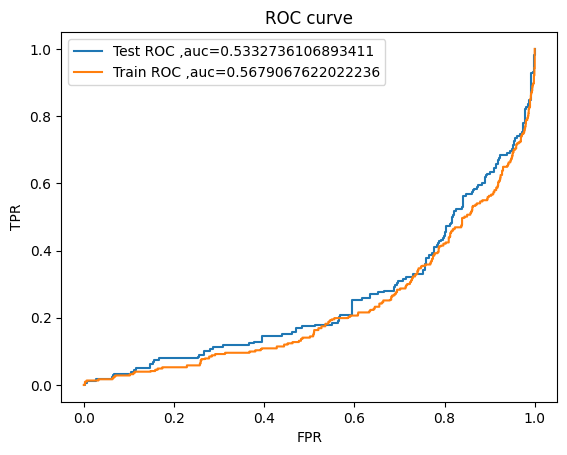

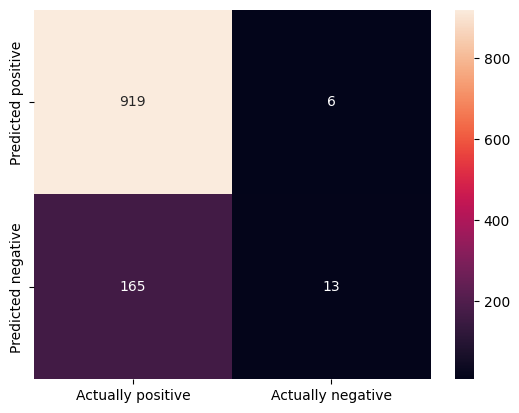

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
train_predict = log_reg.predict(X_train)
train_proba=log_reg.predict_proba(X_train)
test_proba=log_reg.predict_proba(X_test)
test_predict = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_train)
y_pred = np.where(y_prob > 0.5, 1, 0)
plot_auc(log_reg,train_proba,train_predict,test_proba,test_predict)

# SVM without kernel

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.838827    0.0  0.838827     0.419413      0.703630
recall        1.000000    0.0  0.838827     0.500000      0.838827
f1-score      0.912350    0.0  0.838827     0.456175      0.765304
support    2774.000000  533.0  0.838827  3307.000000   3307.000000
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                    0      1  accuracy    macro avg  weighted avg
precision    0.838622    0.0  0.838622     0.419311      0.703287
recall       1.000000    0.0  0.838622     0.500000      0.838622
f1-score     0.912229    0.0  0.838622     0.456114      0.765015
support    925.000000  178.0  0.838622  1103.000000   1103.000000


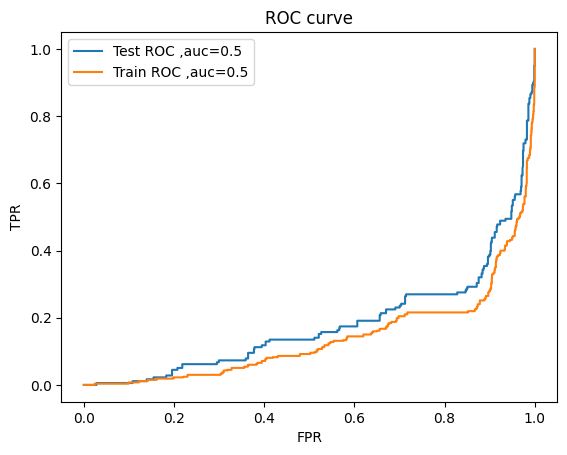

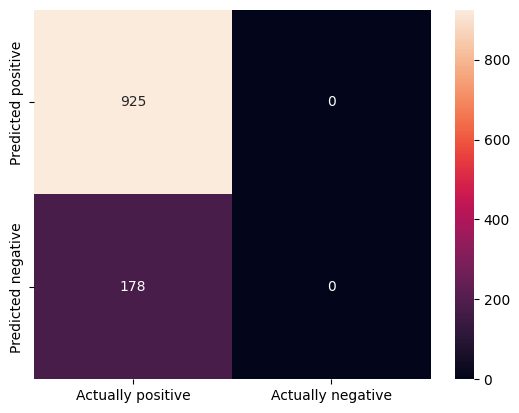

In [ ]:
SVM = svm.SVC(probability=True)
SVM.fit(X_train,Y_train)
train_predict = SVM.predict(X_train)
test_predict = SVM.predict(X_test)
train_proba=SVM.predict_proba(X_train)
test_proba=SVM.predict_proba(X_test)
plot_auc(SVM,train_proba,train_predict,test_proba,test_predict)

# SVM with linear kernel

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.838827    0.0  0.838827     0.419413      0.703630
recall        1.000000    0.0  0.838827     0.500000      0.838827
f1-score      0.912350    0.0  0.838827     0.456175      0.765304
support    2774.000000  533.0  0.838827  3307.000000   3307.000000
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                    0      1  accuracy    macro avg  weighted avg
precision    0.838622    0.0  0.838622     0.419311      0.703287
recall       1.000000    0.0  0.838622     0.500000      0.838622
f1-score     0.912229    0.0  0.838622     0.456114      0.765015
support    925.000000  178.0  0.838622  1103.000000   1103.000000


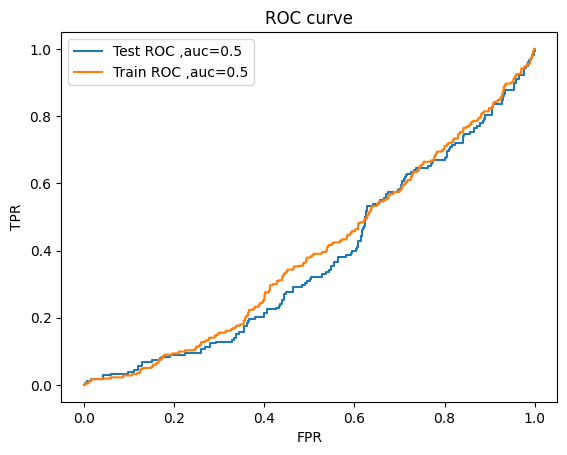

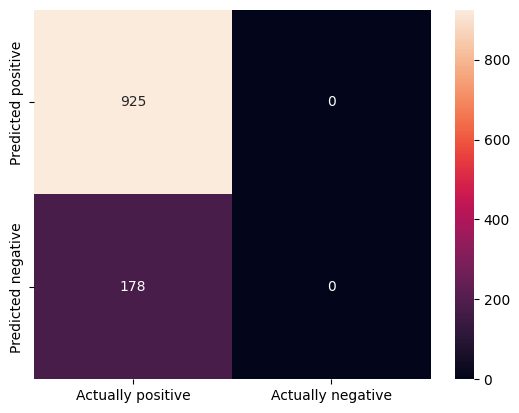

In [ ]:
SVM_k= svm.SVC(kernel='linear',probability=True)
SVM_k.fit(X_train,Y_train)
train_predict = SVM_k.predict(X_train)
test_predict = SVM_k.predict(X_test)
train_proba=SVM_k.predict_proba(X_train)
test_proba=SVM_k.predict_proba(X_test)
plot_auc(SVM_k,train_proba,train_predict,test_proba,test_predict)

# SVM with sigmoid kernel

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.834783    0.134259  0.743272     0.484521      0.721877
recall        0.865177    0.108818  0.743272     0.486997      0.743272
f1-score      0.849708    0.120207  0.743272     0.484958      0.732132
support    2774.000000  533.000000  0.743272  3307.000000   3307.000000
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.835574    0.139706  0.749773     0.487640      0.723276
recall       0.873514    0.106742  0.749773     0.490128      0.749773
f1-score     0.854123    0.121019  0.749773     0.487571      0.735816
support    925.000000  178.000000  0.749773  1103.000000   1103.000000


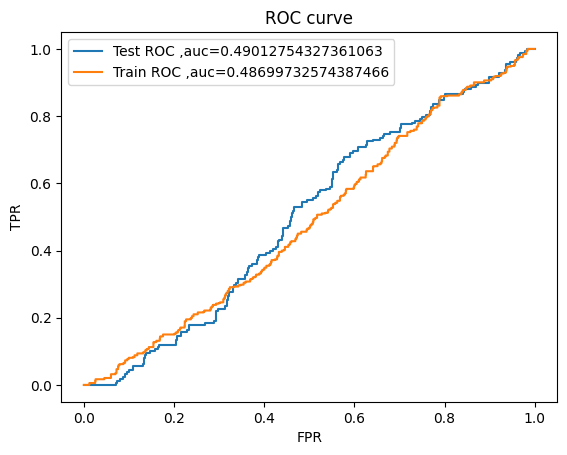

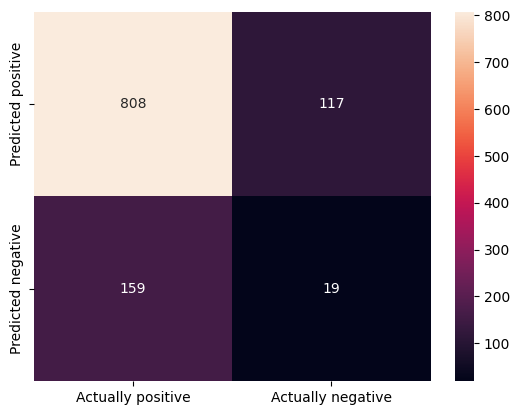

In [ ]:
SVM_kk= svm.SVC(kernel='sigmoid',probability=True)
SVM_kk.fit(X_train,Y_train)
train_predict = SVM_kk.predict(X_train)
test_predict = SVM_kk.predict(X_test)
train_proba=SVM_kk.predict_proba(X_train)
test_proba=SVM_kk.predict_proba(X_test)
plot_auc(SVM_kk,train_proba,train_predict,test_proba,test_predict)

# KNN

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    2774.0  533.0       1.0     3307.0        3307.0
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.988210    0.982353  0.987307     0.985282      0.987265
recall       0.996757    0.938202  0.987307     0.967480      0.987307
f1-score     0.992465    0.959770  0.987307     0.976118      0.987189
support    925.000000  178.000000  0.987307  1103.000000   1103.000000


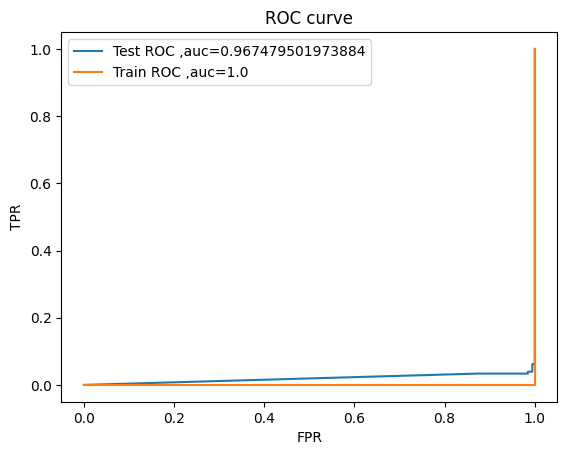

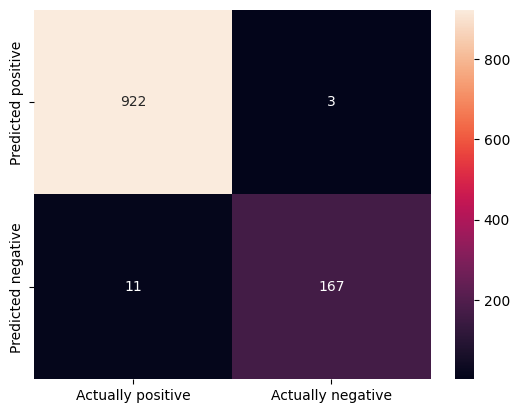

In [ ]:
n_neighbors = 15
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(X_train,Y_train)
train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)
train_proba=knn.predict_proba(X_train)
test_proba=knn.predict_proba(X_test)
plot_auc(knn,train_proba,train_predict,test_proba,test_predict)

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    2774.0  533.0       1.0     3307.0        3307.0
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.989201    0.949153  0.982774     0.969177      0.982738
recall       0.990270    0.943820  0.982774     0.967045      0.982774
f1-score     0.989735    0.946479  0.982774     0.968107      0.982755
support    925.000000  178.000000  0.982774  1103.000000   1103.000000


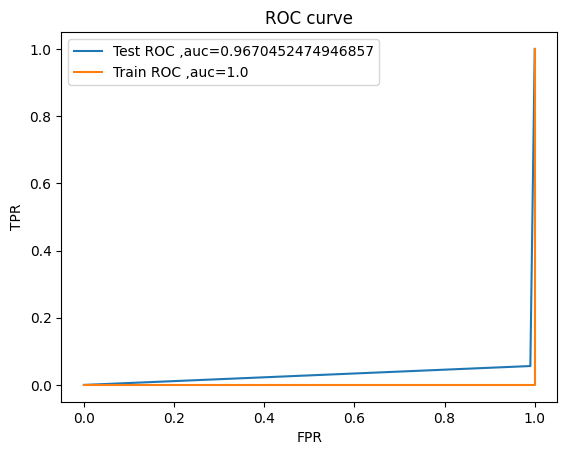

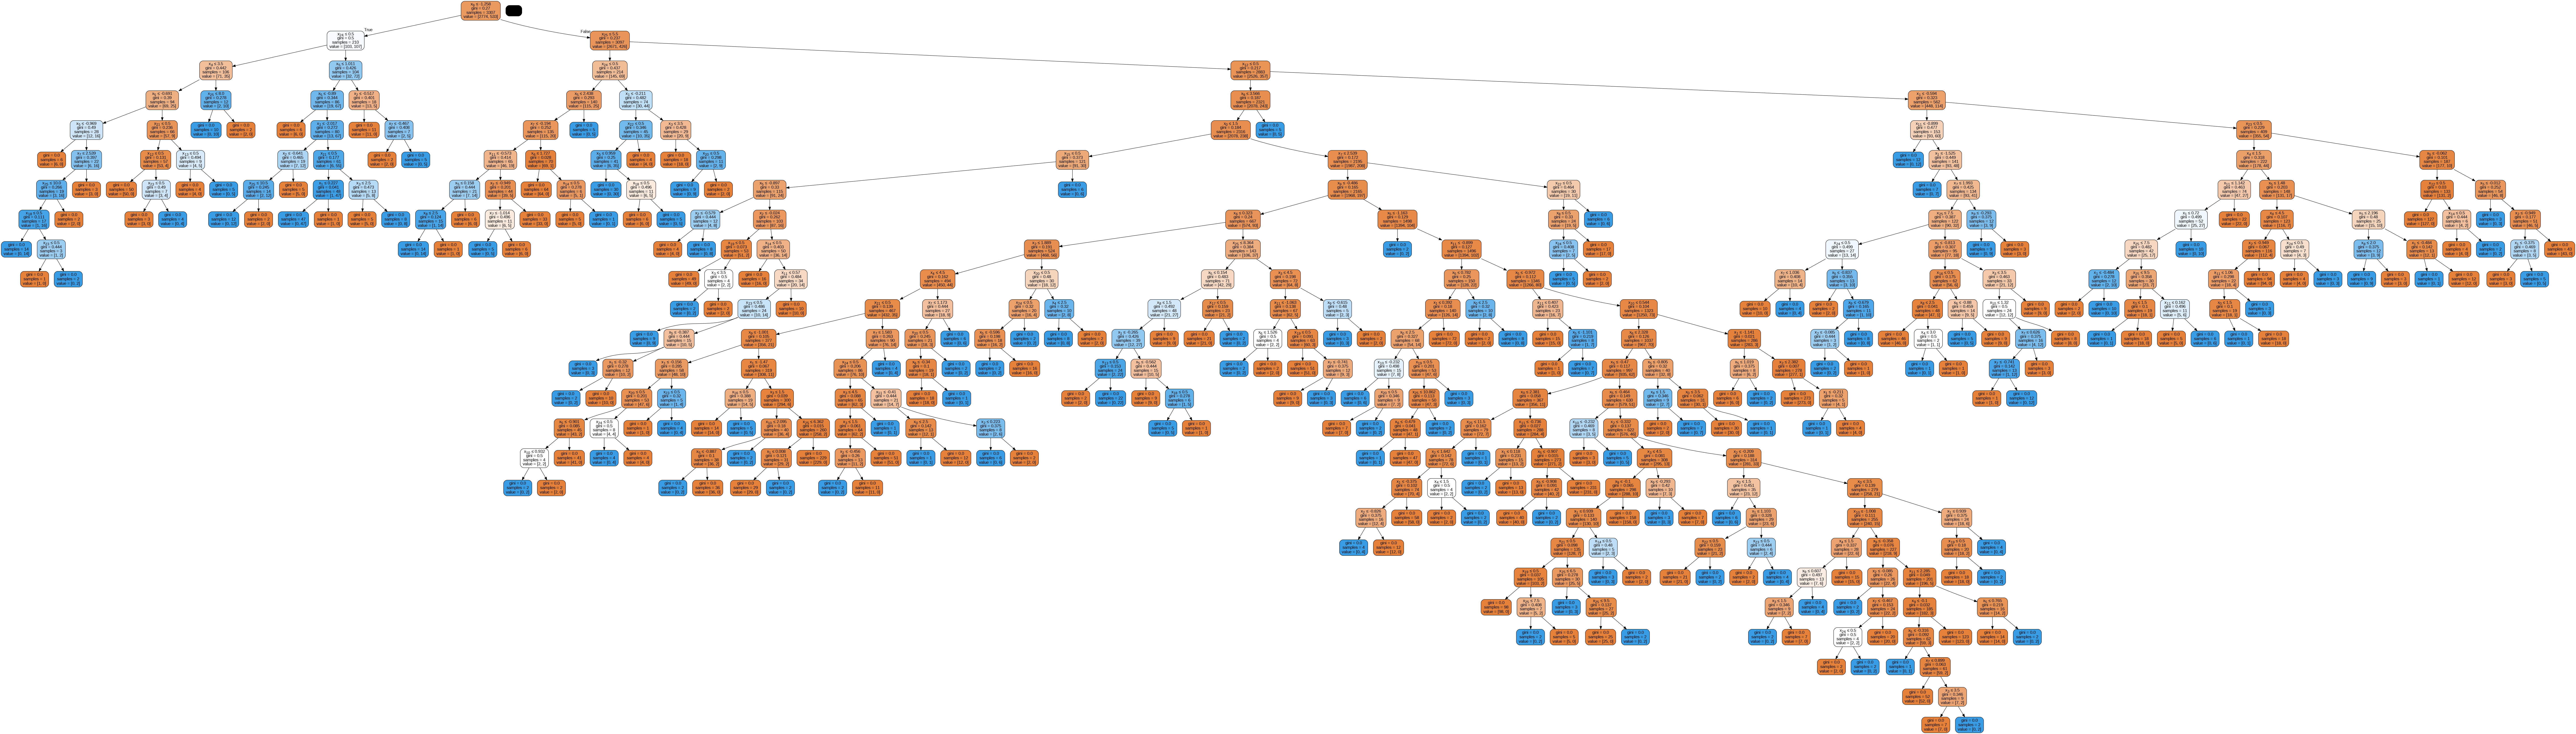

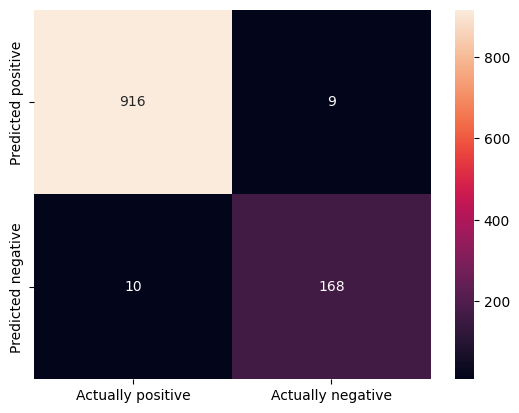

In [ ]:
from sklearn import tree
dec = tree.DecisionTreeClassifier()
dec.fit(X_train,Y_train)
train_predict = dec.predict(X_train)
test_predict = dec.predict(X_test)
train_proba=dec.predict_proba(X_train)
test_proba=dec.predict_proba(X_test)
plot_auc(dec,train_proba,train_predict,test_proba,test_predict)
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dec, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.992132    1.000000  0.993347     0.996066      0.993400
recall        1.000000    0.958724  0.993347     0.979362      0.993347
f1-score      0.996050    0.978927  0.993347     0.987489      0.993290
support    2774.000000  533.000000  0.993347  3307.000000   3307.000000
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.970276    0.931677  0.964642     0.950977      0.964047
recall       0.988108    0.842697  0.964642     0.915402      0.964642
f1-score     0.979111    0.884956  0.964642     0.932033      0.963916
support    925.000000  178.000000  0.964642  1103.000000   1103.000000
Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                     0         

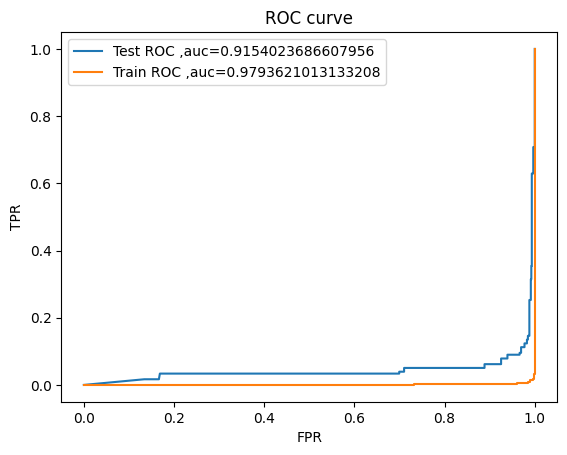

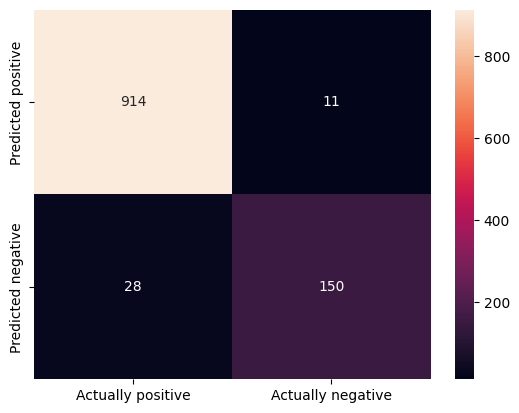

In [ ]:
from sklearn.neural_network import MLPClassifier #Importing the Multi Layer Percepton Model
Neural_MLP = MLPClassifier(hidden_layer_sizes=(13,23,33),max_iter=2500,learning_rate_init=0.001,momentum=0.01,solver='adam')
Neural_MLP.fit(X_train,Y_train) #Fitting the Model
print_score(Neural_MLP, X_train, Y_train, X_test, Y_test, train=True)
print_score(Neural_MLP, X_train, Y_train, X_test, Y_test, train=False)
train_predict = Neural_MLP.predict(X_train)
test_predict = Neural_MLP.predict(X_test)
train_proba=Neural_MLP.predict_proba(X_train)
test_proba=Neural_MLP.predict_proba(X_test)
plot_auc(Neural_MLP,train_proba,train_predict,test_proba,test_predict)

# Unbalanced data +hyperparmeters by default : Accuracies

In [ ]:
results =pd.DataFrame({"Test Accuracy" : test_accuracy , "Train Accuracy" : train_accuracy} , index = models)
results

Test Accuracy  Train Accuracy
Logistic Regression          84.496827       85.485334
SVM without kernel           83.862194       83.882673
SVM with linear kernel       83.862194       83.882673
SVM with sigmoid kernel      74.977335       74.327185
KNN                          98.730734      100.000000
Decision Tree                98.277425      100.000000
Neural Perceptron            96.464189       99.334744

Nous constatons que les Accuracy de KNN ,Decision Tree,Neural Perceptron sont autour de 99-100% dans la partie d'entrainement et 96-99% dans la partie test .

C'est tout à fait logique que les résulats du train soient supérieurs à ceux du test .

Les modéles KNN ,Decision Tree,Neural Perceptron ont des accuracy supérieures a celles de Logistic Regression  et SVM  qui sont autour de 82-85%.

C'est bien d'avoir des bons résultats d'accuracy , mais la métrique 'Accuracy' n'est pas la plus appropriée dans notre problématique car ⁉

Un employé prédit comme churn  ==> en réalité il n'est pas churner (Ce n'est pas grave) mais Un employé prédit comme non churner alors qu'il est churner (C'est grave) donc notre but c'est de minimiser les Faux négatifs ==>maximiser le Recall (F1-score).


# Unbalanced data + hyperparameters by default

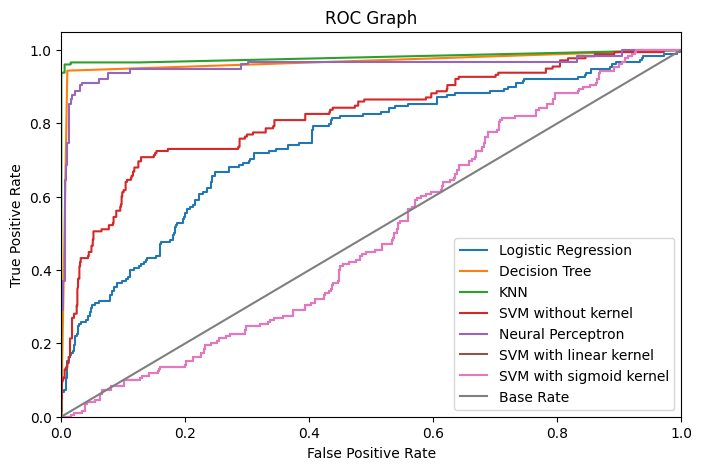

In [ ]:
lr_fpr, lr_tpr, thresholds = roc_curve(Y_test, log_reg.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, thresholds = roc_curve(Y_test, dec.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, thresholds = roc_curve(Y_test, knn.predict_proba(X_test)[:,1])
svm_fpr, svm_tpr, thresholds = roc_curve(Y_test, SVM.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, thresholds = roc_curve(Y_test, Neural_MLP.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(Y_test, SVM_k.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(Y_test, SVM_kk.predict_proba(X_test)[:,1])

plt.figure(figsize = (8,5))
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression' )
plt.plot(dt_fpr, dt_tpr,label = 'Decision Tree')
plt.plot(rf_fpr, rf_tpr, label = 'KNN' )
plt.plot(svm_fpr, svm_tpr, label = 'SVM without kernel')
plt.plot(gbc_fpr, gbc_tpr, label = 'Neural Perceptron')
plt.plot(xgb_fpr, xgb_tpr, label = 'SVM with linear kernel')
plt.plot(xgb_fpr, xgb_tpr, label = 'SVM with sigmoid kernel')
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

KNN,Neural Perceptron et Decision Tree sont trés performants,cependant logistic Regression était moins bon .SVM sans kernel et meilleur que celui avec sigmoid kernel et linear kernel.

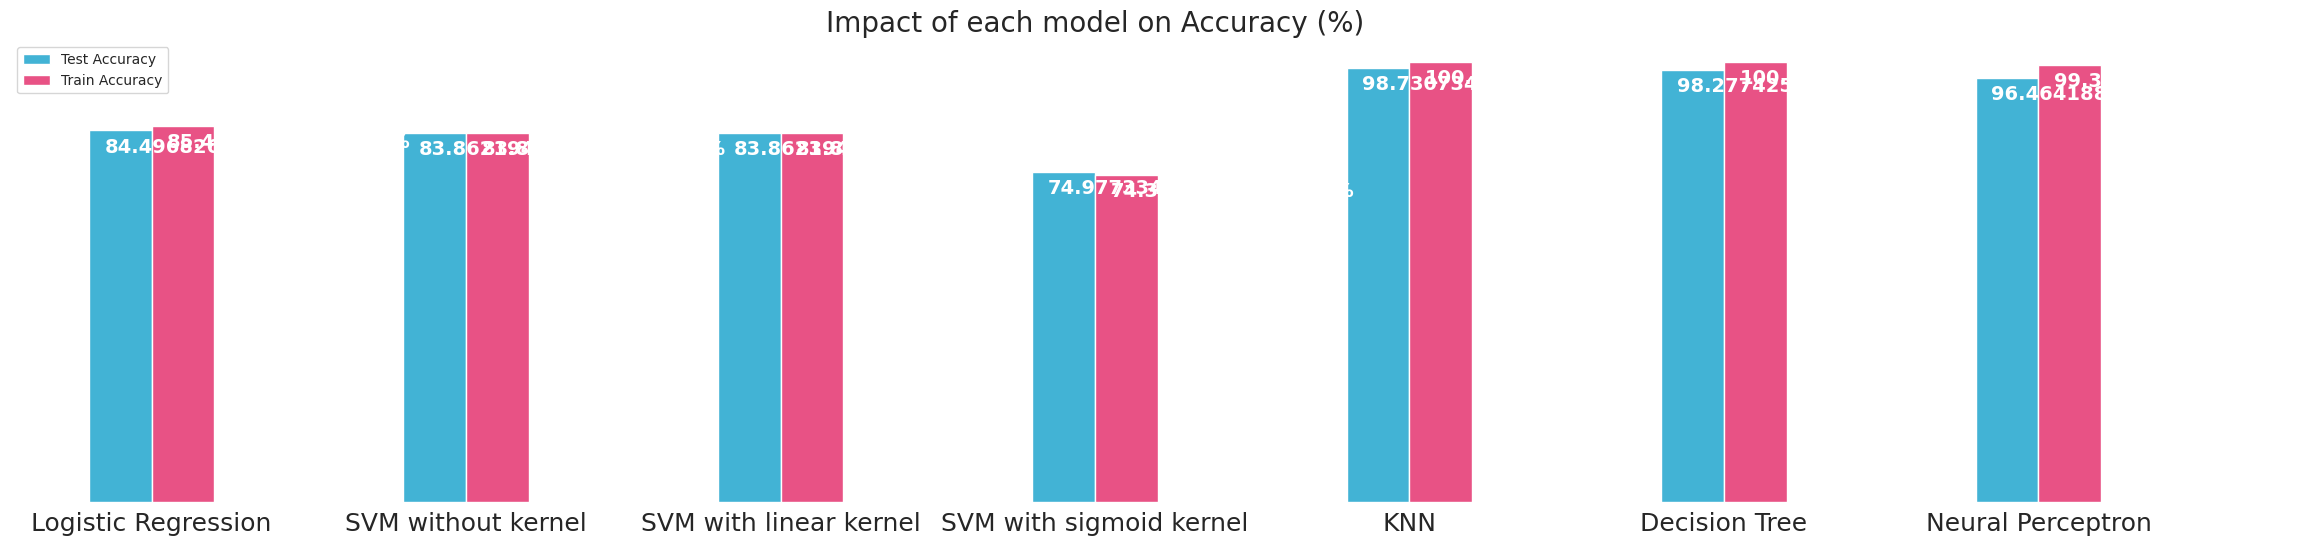

In [ ]:
acc=results
sns.set_style(style='white')
ax = acc.plot(kind='bar', figsize=(28,6), width=0.4, color=['#42b3d5', '#e85285'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of each model on Accuracy (%)', fontsize=20)

for n in range(2):
    for index, val in enumerate(acc.iloc[:,n].transpose()): 
        label=str(val) + '%'
        
        if n==0:
            ax.annotate(label, xy=(index-0.15, val-5), color='#ffffff', fontsize=14, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index+0.05, val-5), color='#ffffff', fontsize=14, fontweight='bold')

plt.show()

# Trouver les bons hyperparamétres avec GridSearchCV

In [ ]:
params = {"criterion":("gini", "entropy"), "max_depth":(list(range(1, 20))), "min_samples_split":[2, 3], "min_samples_leaf":list(range(1, 6))}
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1)
tree_cv.fit(X_train, Y_train)
best_params_dt = tree_cv.best_params_
print(f"Best parameters: {best_params_dt})")

Best parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2})


In [ ]:
LR_grid = {'penalty': ['l2', 'elasticnet'], 'C': [0.25, 0.5, 0.75, 1, 1.25, 0.1],'max_iter': [100, 150],'solver': ['lbfgs', 'liblinear']}
log_reg = LogisticRegression()
log_cv = GridSearchCV(log_reg,  LR_grid,  scoring="f1", n_jobs=-1)
log_cv.fit(X_train, Y_train)
best_params_lr = log_cv.best_params_
print(f"Best parameters: {best_params_lr})")

Best parameters: {'C': 1.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'})


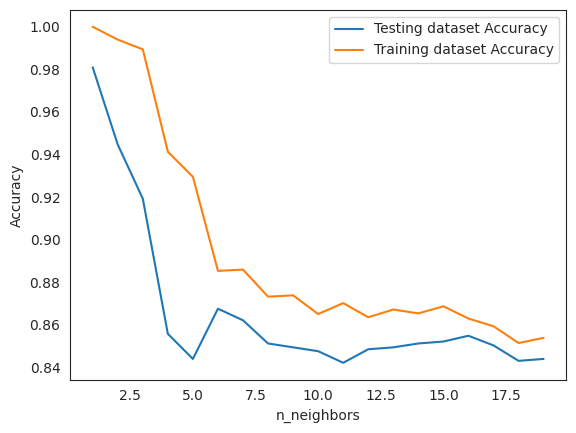

{'n_neighbors': 1}


In [ ]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train) 
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=0) 
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train)
best_params_knn=grid_search.best_params_
print(grid_search.best_params_)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],'kernel':['linear', 'poly', 'sigmoid']} 
#clf_grid = GridSearchCV(SVC(), param_grid, verbose=0,cv=10)
#clf_grid.fit(X_train, Y_train)
#best_params = clf_grid.best_params_
#print(f"Best parameters: {best_params})")

In [ ]:
df_x=X
df_y=Y
x = df_x.iloc[:,:].values
y = df_y.iloc[:].values
y = np.array([y]).T

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 123, stratify =y)

lr = LogisticRegression(**best_params_lr)
lr.fit(x_train,y_train)


dt = DecisionTreeClassifier(**best_params_dt)
dt.fit(x_train,y_train)

knn = KNeighborsClassifier(**best_params_knn)
knn.fit(x_train, y_train)



svm = SVC(kernel = 'poly',probability = True,gamma=1,C=0.1)
svm.fit(x_train,y_train)


SVC(C=0.1, gamma=1, kernel='poly', probability=True)

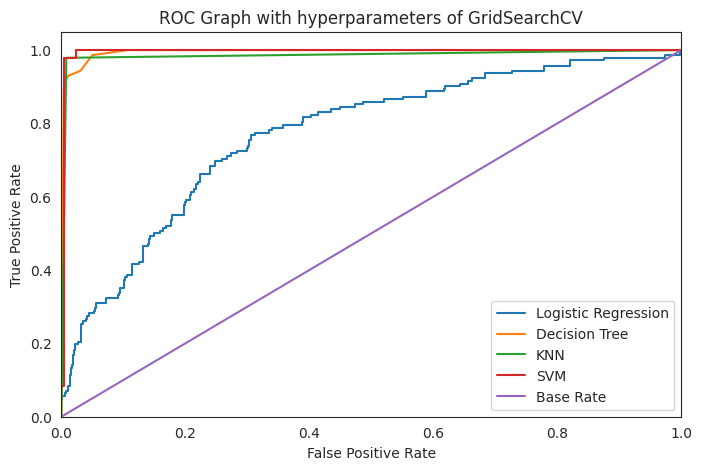

In [ ]:
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm.predict_proba(x_test)[:,1])


plt.figure(figsize = (8,5))
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression' )
plt.plot(dt_fpr, dt_tpr,label = 'Decision Tree')
plt.plot(rf_fpr, rf_tpr, label = 'KNN' )
plt.plot(svm_fpr, svm_tpr, label = 'SVM')
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph with hyperparameters of GridSearchCV')
plt.legend(loc="lower right")
plt.show()

Nous constatons que le fait de trouvé les bons hyperparamétres avec GridSearchCV,a amélioré les performance des modéles

In [ ]:
def basic_classifier(model,params, df_x,df_y):
    model = model(**params)
    kfold = KFold(n_splits = 10)
    x = df_x.iloc[:,:].values
    y = df_y.iloc[:].values
    y = np.array([y]).T
    # Generating cross validated scores
    scores = cross_validate(model,x,y,cv = kfold,scoring = ['accuracy','f1','precision','recall'],return_estimator=True)
    accuracy = round(np.average(scores['test_accuracy'])*100,2)
    precision = round(np.average(scores['test_precision'])*100,2)
    recall = round(np.average(scores['test_recall'])*100,2)
    f1_Score = round(np.average(scores['test_f1'])*100,2)
    data = [[accuracy,precision,recall,f1_Score]]
    print (tabulate(data, headers=["Accuracy", "Precision", "Recall", "F1 Score"]))
    ms=scores['estimator']
    model=ms[-1]
    return accuracy,precision,recall,f1_Score ,model

def sampling_classifier(model, params, df_x, df_y, freq_flag):
    model = model(**params)
    # Initializing the kfold
    kfold = KFold(n_splits = 10)
    x = df_x.iloc[:,:].values
    y = df_y.iloc[:].values
    y = np.array([y]).T
    accuracy = 0
    precision = 0
    recall = 0
    f1_Score = 0
    for train_idx, test_idx in kfold.split(x):

        # Generating test and training set
        x_train, x_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        if freq_flag == "upsample":
            # Initializing SMOTE with a fixed random state for reproducible results
            sm = SMOTE(random_state = 12)

            # Transforming the training data
            x_train_sm, y_train_sm = sm.fit_resample(x_train, np.ravel(y_train, order = 'C'))
            
            # Fitting the transformed data in the model
            model.fit(x_train_sm, y_train_sm)

            # Predicting the model on the test set
            y_test_pred = model.predict(x_test)

            # Storing the metrics
            accuracy = accuracy + accuracy_score(y_test, y_test_pred)
            precision = precision + precision_score(y_test, y_test_pred)
            recall = recall + recall_score(y_test, y_test_pred)
            f1_Score = f1_Score + f1_score(y_test, y_test_pred)


        elif freq_flag == "downsample":
            # Combining both the dataframes
            combo = np.concatenate((x_train,y_train),axis = 1)
            df = pd.DataFrame(data=combo)

            # Separating the dataframe on based of the output labels
            df_majority = df[df.iloc[:,-1] == 0]
            df_minority = df[df.iloc[:,-1] == 1]

            # Downsampling the majority class down to minority class
            df_majority_downsampled = resample(df_majority,replace = False,n_samples = len(df_minority), random_state = 123)

            # Recombining the modified classes
            df_downsampled = pd.concat([df_majority_downsampled,df_minority])
            x_train = df_downsampled.iloc[:,:-1].values
            y_train = df_downsampled.iloc[:,-1].values
            y_train = np.array([y_train]).T

            # Fitting the model on the data
            model.fit(x_train, y_train)

            # Generating the predicted values
            y_test_pred = model.predict(x_test)
            
            # Storing the metrics
            accuracy = accuracy + accuracy_score(y_test, y_test_pred)
            precision = precision + precision_score(y_test, y_test_pred)
            recall = recall + recall_score(y_test, y_test_pred)
            f1_Score = f1_Score + f1_score(y_test, y_test_pred)
            
    accuracy = round(accuracy*10,2)
    precision = round(precision*10,2)
    recall = round(recall*10,2)
    f1_Score = round(f1_Score*10,2)
    class_names = ['Predicted positive','Predicted negative']
    class_names1 = ['Actually positive','Actually negative']
    df_heatmap = pd.DataFrame(confusion_matrix(y_test, y_test_pred.round()), index=class_names, columns=class_names1 )
    fig = plt.figure( )
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")
    # Printing the data
    data = [[accuracy,precision,recall,f1_Score]]
    print (tabulate(data, headers=["Accuracy", "Precision", "Recall", "F1 Score"]))
    return accuracy,precision,recall,f1_Score,model

def sampling_classifier(model, params, df_x, df_y, freq_flag):
    model = model(**params)
    # Initializing the kfold
    kfold = KFold(n_splits = 10)
    x = df_x.iloc[:,:].values
    y = df_y.iloc[:].values
    y = np.array([y]).T
    accuracy = 0
    precision = 0
    recall = 0
    f1_Score = 0
    for train_idx, test_idx in kfold.split(x):

        # Generating test and training set
        x_train, x_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        if freq_flag == "upsample":
            # Initializing SMOTE with a fixed random state for reproducible results
            sm = SMOTE(random_state = 12)

            # Transforming the training data
            x_train_sm, y_train_sm = sm.fit_resample(x_train, np.ravel(y_train, order = 'C'))
            
            # Fitting the transformed data in the model
            model.fit(x_train_sm, y_train_sm)

            # Predicting the model on the test set
            y_test_pred = model.predict(x_test)

            # Storing the metrics
            accuracy = accuracy + accuracy_score(y_test, y_test_pred)
            precision = precision + precision_score(y_test, y_test_pred)
            recall = recall + recall_score(y_test, y_test_pred)
            f1_Score = f1_Score + f1_score(y_test, y_test_pred)


        elif freq_flag == "downsample":
            # Combining both the dataframes
            combo = np.concatenate((x_train,y_train),axis = 1)
            df = pd.DataFrame(data=combo)

            # Separating the dataframe on based of the output labels
            df_majority = df[df.iloc[:,-1] == 0]
            df_minority = df[df.iloc[:,-1] == 1]

            # Downsampling the majority class down to minority class
            df_majority_downsampled = resample(df_majority,replace = False,n_samples = len(df_minority), random_state = 123)

            # Recombining the modified classes
            df_downsampled = pd.concat([df_majority_downsampled,df_minority])
            x_train = df_downsampled.iloc[:,:-1].values
            y_train = df_downsampled.iloc[:,-1].values
            y_train = np.array([y_train]).T

            # Fitting the model on the data
            model.fit(x_train, y_train)

            # Generating the predicted values
            y_test_pred = model.predict(x_test)
            
            # Storing the metrics
            accuracy = accuracy + accuracy_score(y_test, y_test_pred)
            precision = precision + precision_score(y_test, y_test_pred)
            recall = recall + recall_score(y_test, y_test_pred)
            f1_Score = f1_Score + f1_score(y_test, y_test_pred)
            
    accuracy = round(accuracy*10,2)
    precision = round(precision*10,2)
    recall = round(recall*10,2)
    f1_Score = round(f1_Score*10,2)
    class_names = ['Predicted positive','Predicted negative']
    class_names1 = ['Actually positive','Actually negative']
    df_heatmap = pd.DataFrame(confusion_matrix(y_test, y_test_pred.round()), index=class_names, columns=class_names1 )
    fig = plt.figure( )
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")
    # Printing the data
    data = [[accuracy,precision,recall,f1_Score]]
    print (tabulate(data, headers=["Accuracy", "Precision", "Recall", "F1 Score"]))
    return accuracy,precision,recall,f1_Score,model

def TemporayData(model,params, df_x, df_y):
    model = model(**params)
    kfold = KFold(n_splits = 10)
    
    x = df_x.iloc[:,:].values
    y = df_y.iloc[:].values
    y = np.array([y]).T
    scores = cross_validate(model,x,y,cv = kfold,scoring = ['accuracy','f1','precision','recall'])

    accuracy = round(np.average(scores['test_accuracy'])*100,2)
    precision = round(np.average(scores['test_precision'])*100,2)
    recall = round(np.average(scores['test_recall'])*100,2)
    f1_Score = round(np.average(scores['test_f1'])*100,2)


    data = [accuracy,precision,recall,f1_Score]
    return data

def makeGraphTreeAlgos(model, df_x, df_y):
    precision = []
    recall = []
    f1 = []
    vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    for i in vals:
        data = TemporayData(model,{'random_state':27, 'max_depth':i},df_x,df_y)
        precision.append(data[1])
        recall.append(data[2])
        f1.append(data[3])

    plt.figure()
    plt.plot(vals, precision, label = "Precision")
    plt.plot(vals, recall, label = "Recall")
    plt.plot(vals, f1, label = "F1-score")
    plt.xlabel("Depth")
    plt.ylabel("Values")
    plt.legend()
    plt.show()

def plot_data(models,x_test,y_test):
     plt.figure(figsize = (15,6))
     plt.plot([0,1], [0,1],label='Base Rate')
     for elem in models:
          nom_model=elem['Modèle']
          model=elem['model']
          lr_fpr, lr_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
          plt.plot(lr_fpr, lr_tpr, label = nom_model )
      
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.05])
     plt.xlabel('False Positive Rate')
     plt.ylabel('True Positive Rate')
     plt.title('ROC Graph')
     plt.legend(loc="lower right")
     plt.show()

In [ ]:
l=[]
ll=[]
l_unbalanced=[]
l_oversampled=[]
l_downsampled=[]

In [ ]:
a,b,c,dd,model =basic_classifier(LogisticRegression,best_params_lr,df_x,df_y)
d=dict()
r=dict()
d['Modèle']='Logistic Regression for unbalanced  data'
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
r['Modèle']='Logistic Regression for unbalanced  data'
r['model']=model
l.append(d)
ll.append(r)
l_unbalanced.append(r)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     84.94        69.35     12.36       20.83


  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     68.82        29.88     69.21       41.63


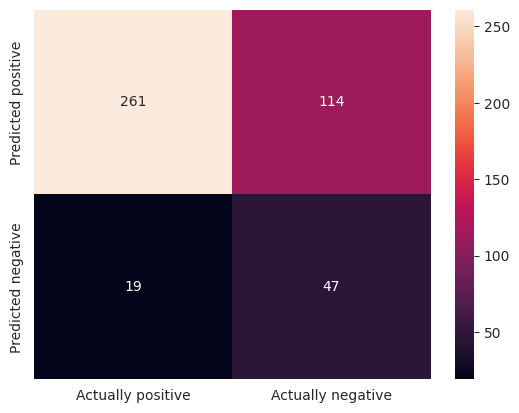

In [ ]:
a,b,c,dd,model=sampling_classifier(LogisticRegression,best_params_lr,df_x,df_y,"upsample")
d=dict()
r=dict()
d['Modèle']='Logistic Regression for oversampled data'
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
r['Modèle']='Logistic Regression for oversampled  data'
r['model']=model
l.append(d)
ll.append(r)
l_oversampled.append(r)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
      68.3        29.81     71.46          42


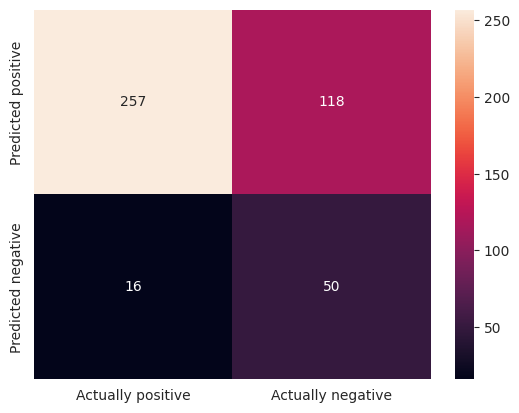

In [ ]:
a,b,c,dd,model=sampling_classifier(LogisticRegression,best_params_lr,df_x,df_y,"downsample")
d=dict()
r=dict()
d['Modèle']='Logistic Regression for downsampled data'
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
r['Modèle']='Logistic Regression for downsampled  data'
r['model']=model
l.append(d)
ll.append(r)
l_downsampled.append(r)

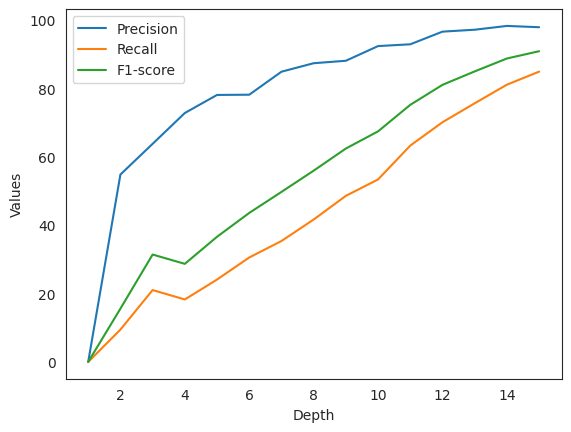

In [ ]:
makeGraphTreeAlgos(DecisionTreeClassifier, df_x, df_y)

In [ ]:
a,b,c,dd,model=basic_classifier(DecisionTreeClassifier,best_params_dt,df_x,df_y)
d=dict()
r=dict()
d['Modèle']='Decision tree for unbalanced data'
r['Modèle']='Decision tree for unbalanced data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_unbalanced.append(r)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     99.39        99.18     97.07       98.11


  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     99.91        99.88     99.56       99.72


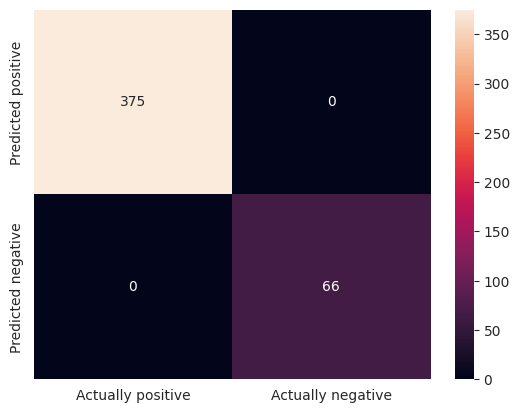

In [ ]:
a,b,c,dd,model=sampling_classifier(DecisionTreeClassifier,best_params_dt,df_x,df_y,"upsample")
d=dict()
r=dict()
d['Modèle']='Decision tree for oversampled data'
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
r['Modèle']='Decision tree for oversampled data'
r['model']=model
l.append(d)
ll.append(r)
l_oversampled.append(r)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     85.03        51.88       100       68.23


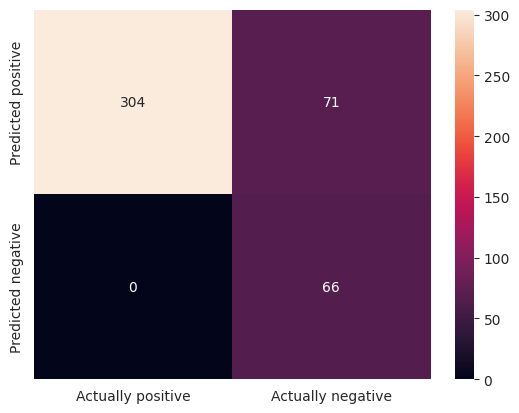

In [ ]:
a,b,c,dd,model=sampling_classifier(DecisionTreeClassifier,best_params_dt,df_x,df_y,"downsample")
d=dict()
r=dict()
d['Modèle']='Decision tree for downsampled data'
r['Modèle']='Decision tree for downsampled data'
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
r['model']=model
l.append(d)
ll.append(r)
l_downsampled.append(r)

Nous constatons que Decision Tree n'est pas performant en terme de precision dans le cas des downsampled data

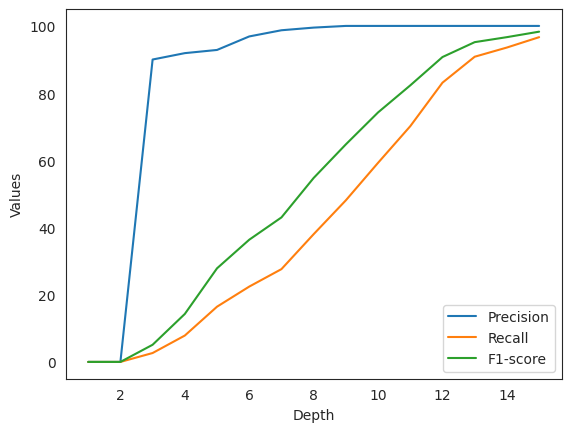

In [ ]:
makeGraphTreeAlgos(RandomForestClassifier, df_x, df_y)

A partir de ce graphe , nous pouvon dire que le bon max_depth pour le modéle de random Forest est :14

In [ ]:
a,b,c,dd,model= basic_classifier(RandomForestClassifier,{'random_state':27, 'max_depth':14},df_x,df_y)
d=dict()
r=dict()
d['Modèle']='Random Forest for unbalanced data'
r['Modèle']='Random Forest for unbalanced data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_unbalanced.append(r)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     98.96          100     93.57       96.66


  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     99.93        99.85     99.71       99.78


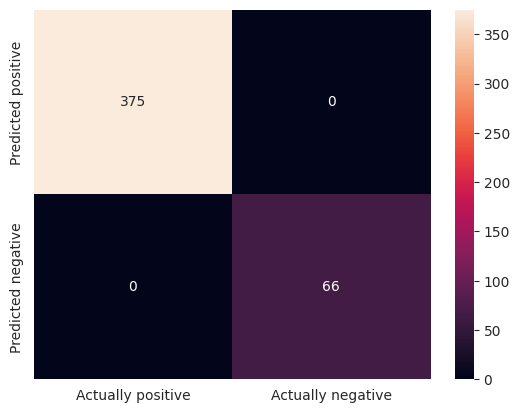

In [ ]:
a,b,c,dd,model=sampling_classifier(RandomForestClassifier,{'random_state':27,'max_depth':14},df_x,df_y,"upsample")
d=dict()
r=dict()
d['Modèle']='Random Forest for oversampled data'
r['Modèle']='Random Forest for oversampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_oversampled.append(r)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     92.24        67.63       100       80.65


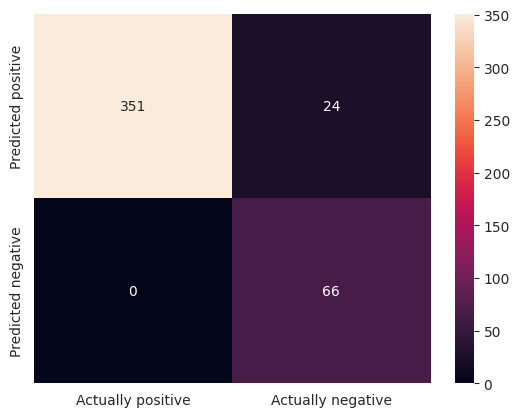

In [ ]:
a,b,c,dd,model=sampling_classifier(RandomForestClassifier,{'random_state':27,'max_depth':14},df_x,df_y,"downsample")
d=dict()
r=dict()
d['Modèle']='Random Forest for downsampled data'
r['Modèle']='Random Forest for downsampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_downsampled.append(r)

Random Forest est moins performant dans le cas de downsampled data

# SVM with linear ,poly,rbf and sigmoid kernel

In [ ]:
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    basic_classifier(SVC, {'kernel':i,'probability':True,'gamma':1}, df_x, df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     83.88            0         0           0
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     99.93        99.73     99.85       99.79
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     99.89          100     99.27       99.63
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     83.88            0         0           0


Nous constatons que les kernels poly et rbf donnent de bons résultats d'accuracy et de Precision cependant les résulats des Recall et F1-score sont faibles et cela pour les données désiquilibrées .

In [ ]:
a,b,c,dd,model=basic_classifier(SVC,{'kernel':'rbf','probability':True,'gamma':1},df_x,df_y)
d=dict()
r=dict()
d['Modèle']='SVM for unbalanced data'
r['Modèle']='SVM for unbalanced data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_unbalanced.append(r)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     99.89          100     99.27       99.63


  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     99.89          100     99.27       99.63


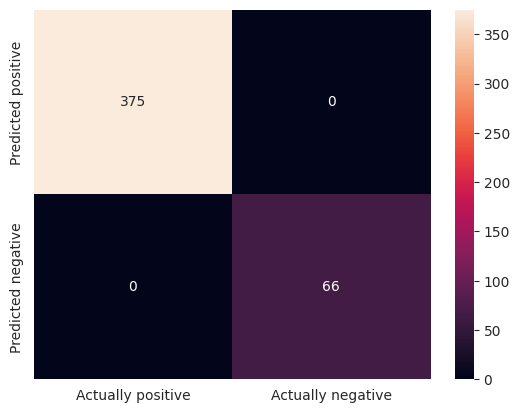

In [ ]:
a,b,c,dd,model=sampling_classifier(SVC,{'kernel':'rbf','probability':True,'gamma':1},df_x,df_y,"upsample")
d=dict()
r=dict()
d['Modèle']='SVM for oversampled data'
r['Modèle']='SVM for oversampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
l_oversampled.append(r)
ll.append(r)

Nous constatons que pour les données oversampled , le Recall est amélioré cependant la Précision a diminué.

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     99.89          100     99.27       99.63


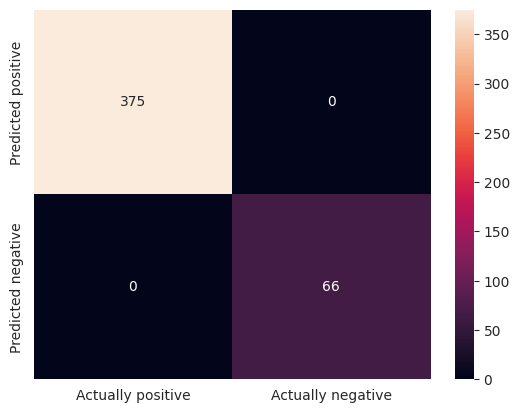

In [ ]:
a,b,c,dd,model=sampling_classifier(SVC,{'kernel':'rbf','probability':True,'gamma':1},df_x,df_y,"downsample")
d=dict()
r=dict()
d['Modèle']='SVM for downsampled data'
r['Modèle']='SVM for downsampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_downsampled.append(r)

Nous constatons que pour les données downsampled, le Recall est amélioré cependant la Précision  et l'accuracy ont diminué.

In [ ]:
a,b,c,dd,model=basic_classifier(GradientBoostingClassifier, {'max_depth':5}, df_x, df_y)
d=dict()
r=dict()
d['Modèle']='GradientBoostingClassifier for unbalanced data'
r['Modèle']='GradientBoostingClassifier for unbalanced data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
l_unbalanced.append(r)
ll.append(r)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
      97.1        99.68     82.26       90.09


GBClassifier donnent de trés bons résulats pour les données désiquilibrées avec l'hyperparamétre max_depth =5

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     88.98        59.54     98.05       74.05


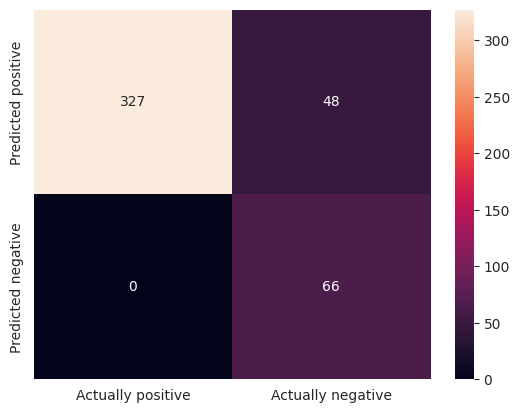

In [ ]:
a,b,c,dd,model=sampling_classifier(GradientBoostingClassifier, {'max_depth':5}, df_x, df_y, "downsample")
d=dict()
r=dict()
d['Modèle']='GradientBoostingClassifier for downsampled data'
r['Modèle']='GradientBoostingClassifier for downsampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_downsampled.append(r)

GBClassifier sur les données downsampled diminue la précision et augmente le Recall avec l'hyperparamétre max_depth =5

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
      96.6        93.64     84.66       88.87


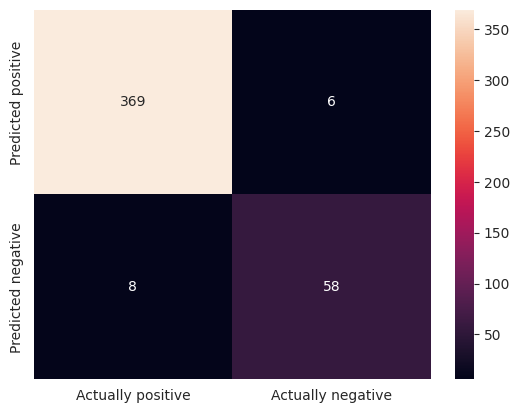

In [ ]:
a,b,c,dd,model=sampling_classifier(GradientBoostingClassifier, {'max_depth':5}, df_x, df_y, "upsample")
d=dict()
r=dict()
d['Modèle']='GradientBoostingClassifier for oversampled data'
r['Modèle']='GradientBoostingClassifier for oversampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_oversampled.append(r)

Nous constatons que pour les données oversampled donne de trés bons résultats en accuracy,precision, recall et F1-score .

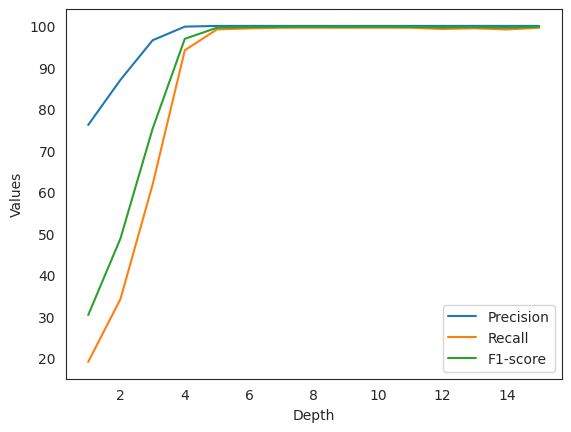

In [ ]:
makeGraphTreeAlgos(XGBClassifier, df_x, df_y)

La meilleure valeur de max_depth pour le modéle XGBClassifier est 5

In [ ]:
a,b,c,dd,model=basic_classifier(XGBClassifier, {'max_depth':5}, df_x, df_y)
d=dict()
r=dict()
d['Modèle']='XGBClassifier for unbalanced data'
r['Modèle']='XGBClassifier for unbalanced data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_unbalanced.append(r)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     99.86          100     99.16       99.57


  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     99.91        99.88     99.58       99.73


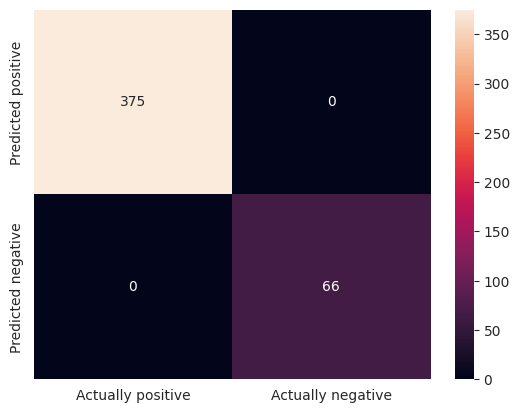

In [ ]:
a,b,c,dd,model=sampling_classifier(XGBClassifier, {'max_depth':5}, df_x, df_y, "upsample")
d=dict()
r=dict()
d['Modèle']='XGBClassifier for oversampled data'
r['Modèle']='XGBClassifier for oversampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_oversampled.append(r)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     89.93        61.57      99.7       76.11


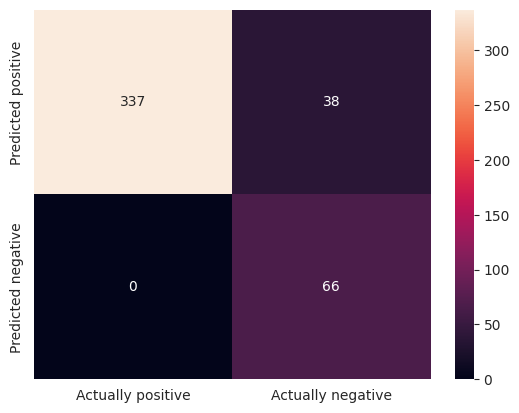

In [ ]:
a,b,c,dd,model=sampling_classifier(XGBClassifier, {'max_depth':5}, df_x, df_y, "downsample")
d=dict()
r=dict()
d['Modèle']='XGBClassifier for downsampled data'
r['Modèle']='XGBClassifier for downsampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_downsampled.append(r)

# Results of different metrics :Accuracy,Precision,Recall and F1-score for unbalanced , oversampled and downsampled data 

In [ ]:
res=pd.DataFrame(l,columns=['Modèle','Accuracy','Precision','Recall','F1_score'])
res=res.set_index('Modèle')
res

Accuracy Precision Recall  \
Modèle                                                                      
Logistic Regression for unbalanced  data           84.94     69.35  12.36   
Logistic Regression for oversampled data           68.82     29.88  69.21   
Logistic Regression for downsampled data            68.3     29.81  71.46   
Decision tree for unbalanced data                  99.39     99.18  97.07   
Decision tree for oversampled data                 99.91     99.88  99.56   
Decision tree for downsampled data                 85.03     51.88  100.0   
Random Forest for unbalanced data                  98.96     100.0  93.57   
Random Forest for oversampled data                 99.93     99.85  99.71   
Random Forest for downsampled data                 92.24     67.63  100.0   
SVM for unbalanced data                            99.89     100.0  99.27   
SVM for oversampled data                           99.89     100.0  99.27   
SVM for downsampled data                           99.89     100.0  99.27   
GradientBoostingClassifier for unbalanced data      97.1     99.68  82.26   
GradientBoostingClassifier for downsampled data    88.98     59.54  98.05   
GradientBoostingClassifier for oversampled data     96.6     93.64  84.66   
XGBClassifier for unbalanced data                  99.86     100.0  99.16   
XGBClassifier for oversampled data                 99.91     99.88  99.58   
XGBClassifier for downsampled data                 89.93     61.57   99.7   

                                                F1_score  
Modèle                                                    
Logistic Regression for unbalanced  data           20.83  
Logistic Regression for oversampled data           41.63  
Logistic Regression for downsampled data            42.0  
Decision tree for unbalanced data                  98.11  
Decision tree for oversampled data                 99.72  
Decision tree for downsampled data                 68.23  
Random Forest for unbalanced data                  96.66  
Random Forest for oversampled data                 99.78  
Random Forest for downsampled data                 80.65  
SVM for unbalanced data                            99.63  
SVM for oversampled data                           99.63  
SVM for downsampled data                           99.63  
GradientBoostingClassifier for unbalanced data     90.09  
GradientBoostingClassifier for downsampled data    74.05  
GradientBoostingClassifier for oversampled data    88.87  
XGBClassifier for unbalanced data                  99.57  
XGBClassifier for oversampled data                 99.73  
XGBClassifier for downsampled data                 76.11

Le Recall dans SVM était bon pour les données équilibrées (oversampling et downsampling),cependant la plus grande accuracy est obtenu sur les données désiquilibrées .

Decision Tree ,Random Forest, GradientBoostingClassifier et XGBClassifier ont donné une faible precision sur les downsampled data , ce qui a diminué la F1-score

In [ ]:
acc=res
#acc=acc[['Precision','Recall']]
acc=acc.astype(float)
def plot_metrics(acc):
    sns.set_style(style='white')
    ax = acc.plot(kind='bar', figsize=(20,5), width=0.4, color=['#42b3d5', '#e85285','#00FF00','#FFBF00'], fontsize=18)

    ax.legend(loc='best')
    plt.xticks(rotation=0, ha="center")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(False)
    ax.spines['left'].set_linewidth(False)

    ax.yaxis.grid()
    ax.get_yaxis().set_visible(False)

    for n in range(2):
        for index, val in enumerate(acc.iloc[:,n].transpose()): 
            label=str(val) + '%'
            
            if n==0:
                ax.annotate(label, xy=(index-0.15, val-5), color='#ffffff', fontsize=14, fontweight='bold')
            elif n==1:
                ax.annotate(label, xy=(index+0.05, val-5), color='#ffffff', fontsize=14, fontweight='bold')

    plt.show()

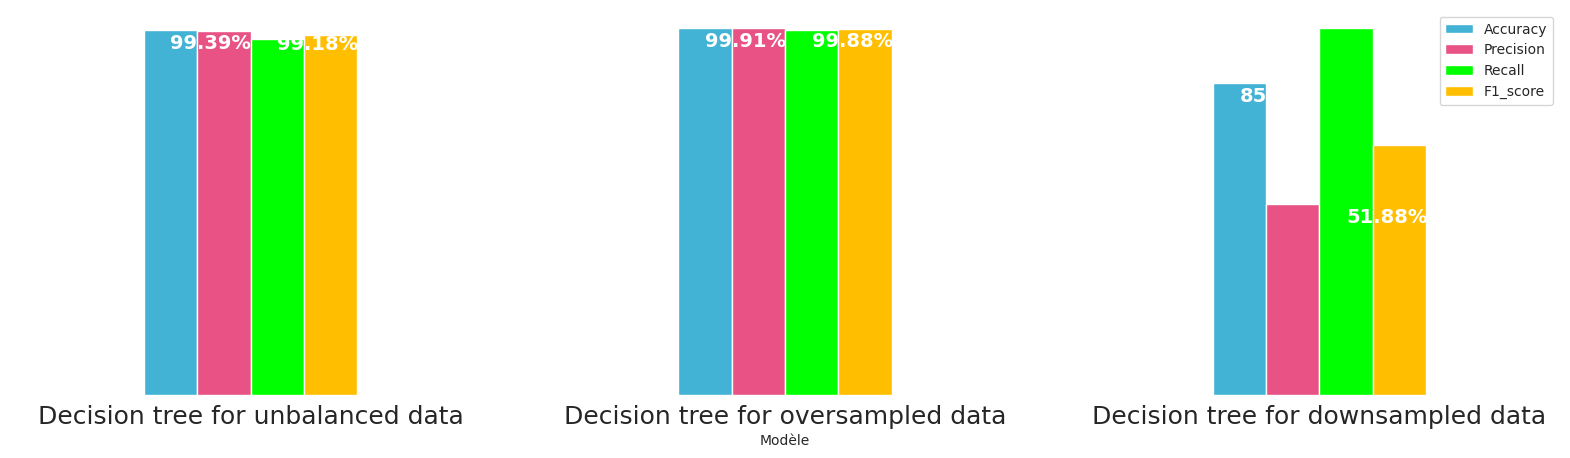

In [ ]:
plot_metrics(acc[3:6])

Decision Tree est plus performant sur les oversampled data et unbalanced data , cependant  nous pouvons pas faire confiance a un bon modéle obtenu à partir des données désiquilibrées puisque il y'as une surpérsentation de a classe majoritaire ,le modéle raisonne de facon a ce que pour une observation donnée ,la probabilité qu'elle appartienne a la classe majoritaire est plus grande au cas contraire .

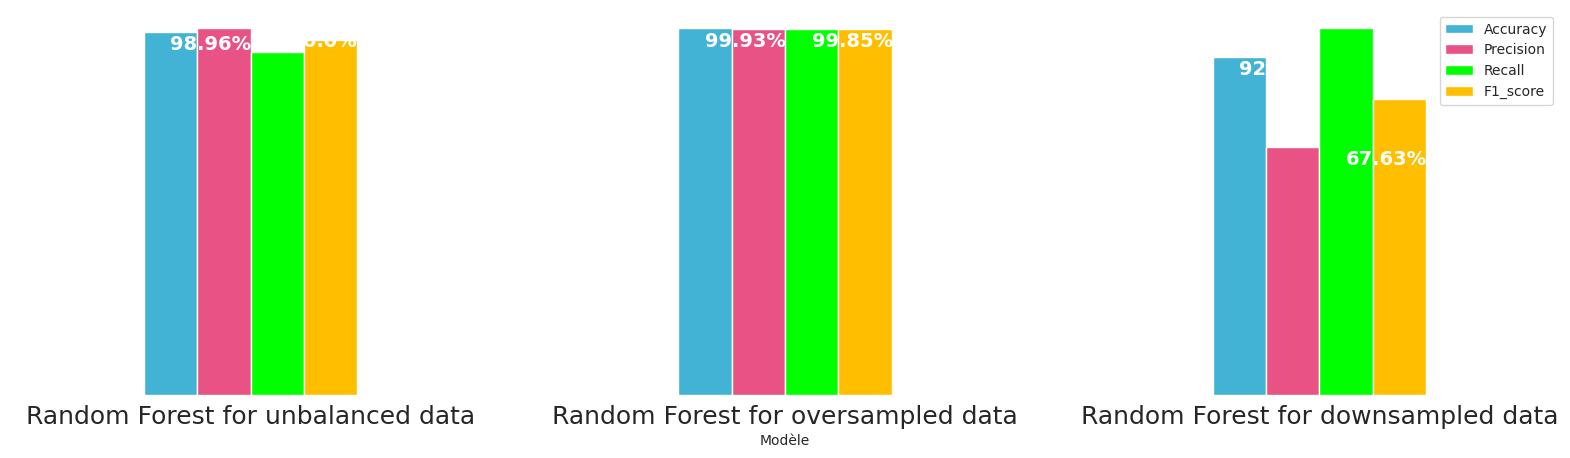

In [ ]:
plot_metrics(acc[6:9])

Random Forest est plus performant sur les oversampled data

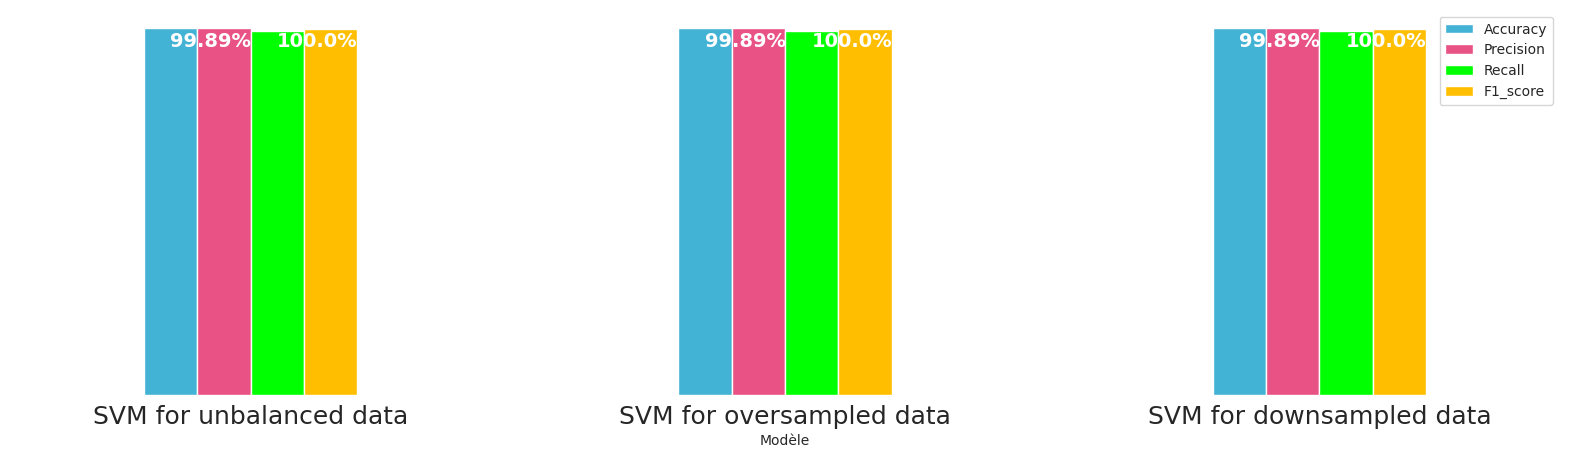

In [ ]:
plot_metrics(acc[9:12])

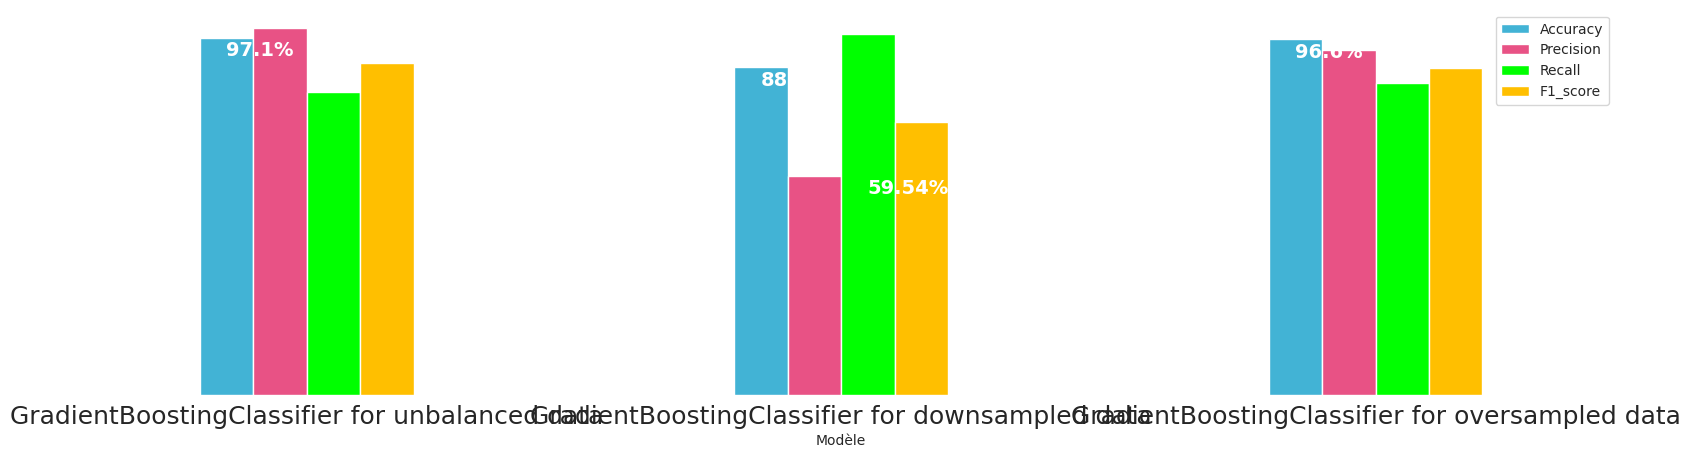

In [ ]:
plot_metrics(acc[12:15])

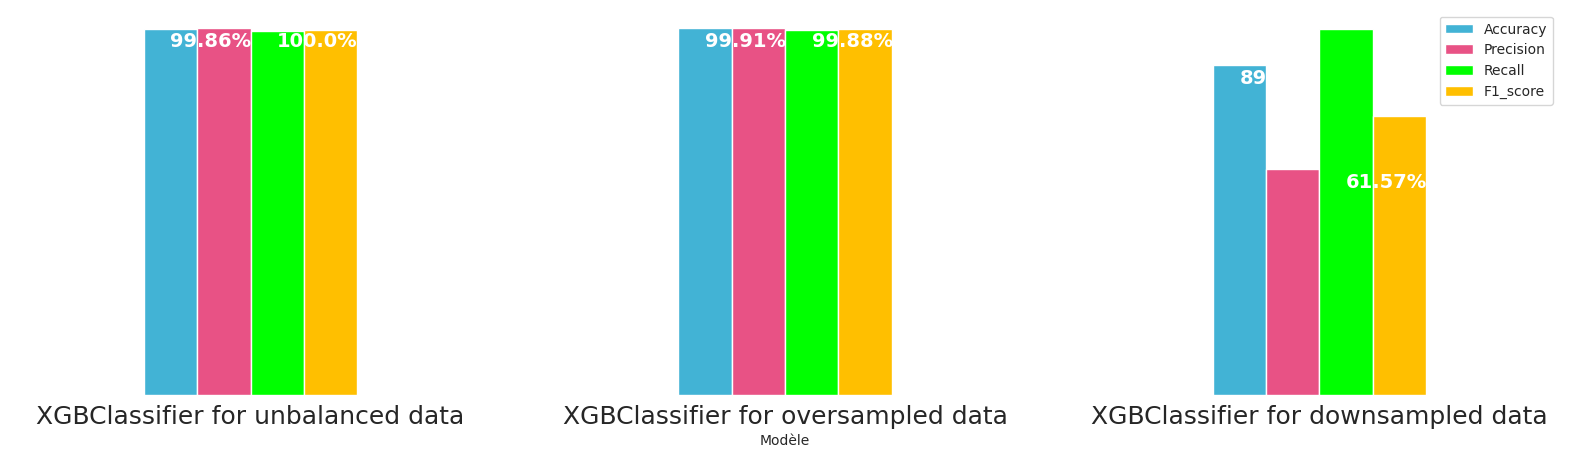

In [ ]:
plot_metrics(acc[15:18])

Gradient Bossting Classifier est plus performant sur les oversampled data

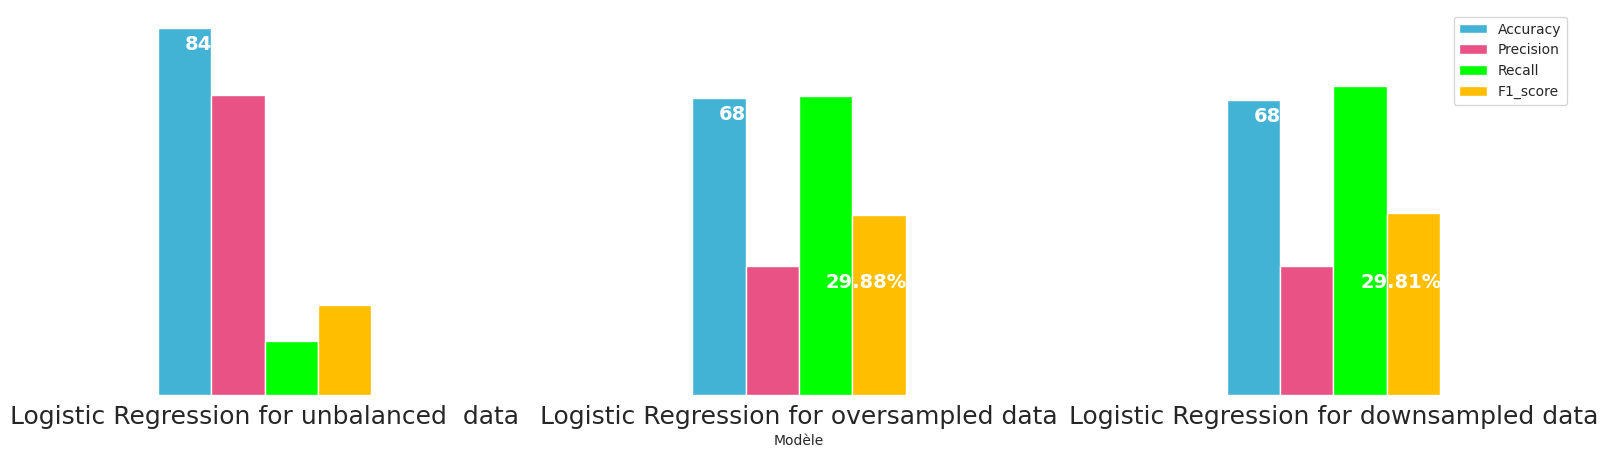

In [ ]:
plot_metrics(acc[0:3])

# ROC graph for all models with hyperparameters found with Cross Validator (10 splits)

In [ ]:
x = df_x.iloc[:,:].values
y = df_y.iloc[:].values
y = np.array([y]).T

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 123, stratify =y)

lr = LogisticRegression(**best_params_lr)
lr.fit(x_train,y_train)


dt = DecisionTreeClassifier(**best_params_dt)
dt.fit(x_train,y_train)

rf = RandomForestClassifier(max_depth = 14)
rf.fit(x_train, y_train)



svm = SVC(kernel = 'rbf',probability = True,gamma=1,C=0.1)
svm.fit(x_train,y_train)

gbc = GradientBoostingClassifier(max_depth = 5)
gbc.fit(x_train, y_train)

xgb = XGBClassifier(max_depth = 5)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

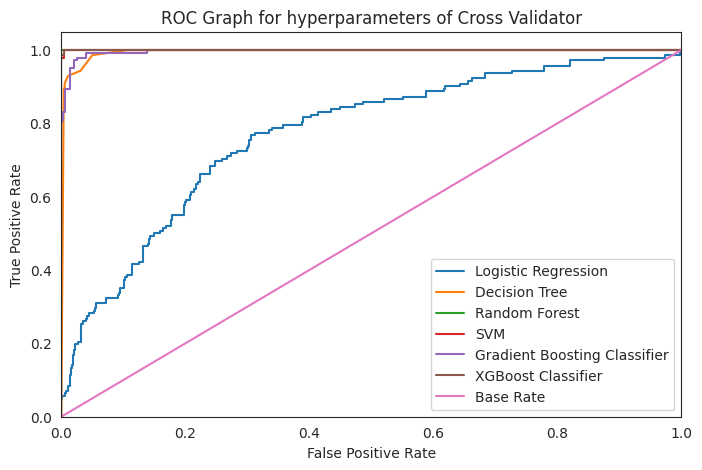

In [ ]:
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm.predict_proba(x_test)[:,1])
gbc_fpr, gbc_tpr, thresholds = roc_curve(y_test, gbc.predict_proba(x_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb.predict_proba(x_test)[:,1])

plt.figure(figsize = (8,5))
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression' )
plt.plot(dt_fpr, dt_tpr,label = 'Decision Tree')
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest' )
plt.plot(svm_fpr, svm_tpr, label = 'SVM')
plt.plot(gbc_fpr, gbc_tpr, label = 'Gradient Boosting Classifier')
plt.plot(xgb_fpr, xgb_tpr, label = 'XGBoost Classifier')
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph for hyperparameters of Cross Validator')
plt.legend(loc="lower right")
plt.show()

Avec les bons hypermarametres trouvées grace a Cross Validator(10 splits) sur les données désiquilibrées ,les meilleurs modéle en terme d'AUC sont Random Forest ,XGBoostClassifier et Gradient Boosting Classifier . Mais , Decison Tree et Logistic Regression sont aussi bons .SVM était le modéle le moins bon .

# Features Selection for Random Forest

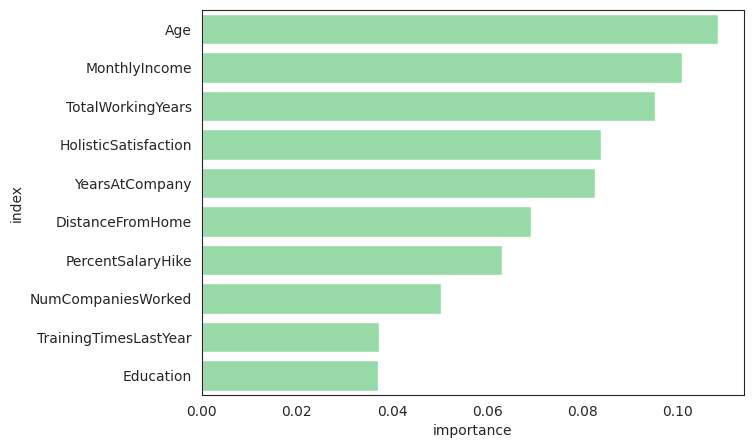

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()[:10]
f, ax = plt.subplots(figsize=(7,5))
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,label="Total", color="g");

Les variables les plus importantes pour le modéle Random Forest sont : age ,salaire ,TotalWorkingYears,Years At Company ... Cela nous dit bien que la procédure 
Features Selection éffectuée précédemment avec les tests statistiques (Chi2 , mutual information) "avaient raison" 

# Features selection for Gradient Boosting Classifier 

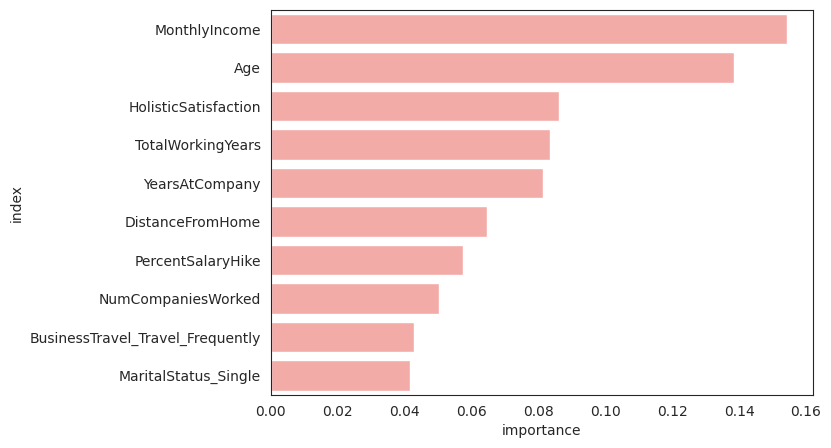

In [ ]:
feature_importances = pd.DataFrame(gbc.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()[:10]
f, ax = plt.subplots(figsize=(7,5))
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,label="Total", color="r");

Pour le modèle Gradient Bossting Classifier ,les 10 variables les plus importantes sont presque les meme que celles qu'on  a trouvé pour le Random Forest sauf que les scores des varaibles qui changent .

# Features Selection for XGBClassifier

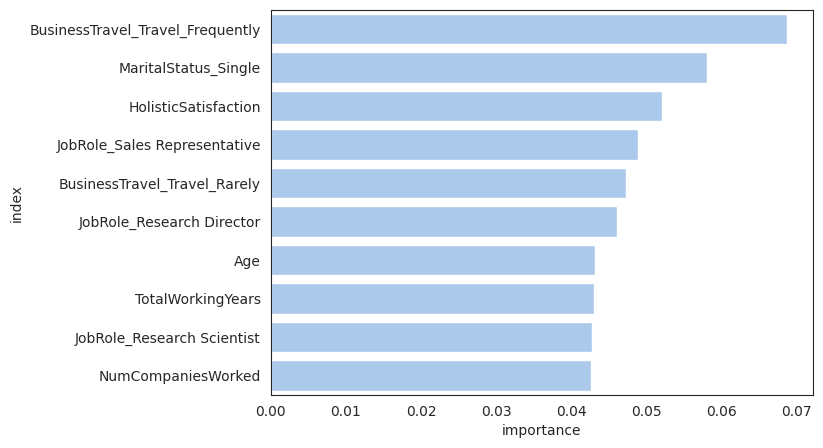

In [ ]:
feature_importances = pd.DataFrame(xgb.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()[:10]
f, ax = plt.subplots(figsize=(7,5))
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,label="Total", color="b");

# Features importance for Decision Tree

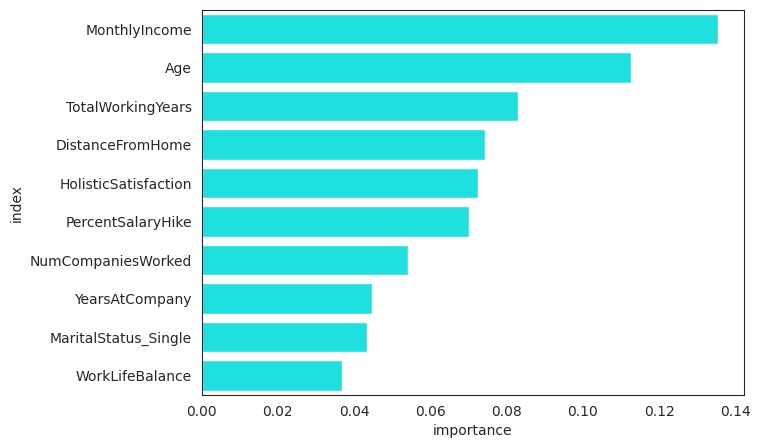

In [ ]:
feature_importances = pd.DataFrame(dt.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()[:10]
f, ax = plt.subplots(figsize=(7,5))
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,label="Total", color='cyan');

# ROC graph for unbalanced data

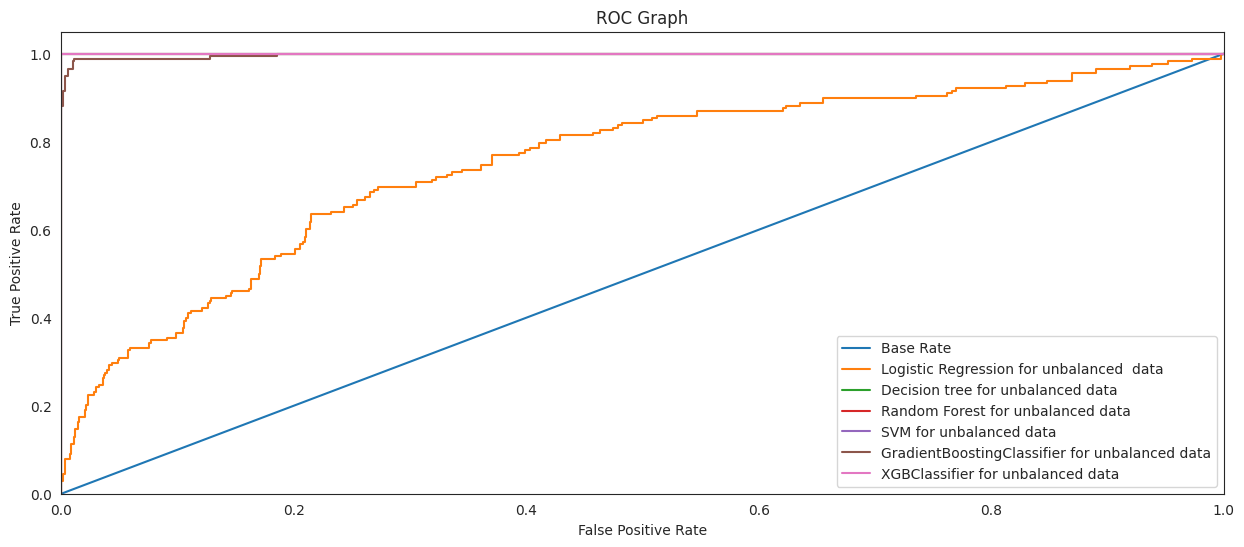

In [ ]:
plot_data(l_unbalanced,X_test,Y_test)

# ROC graph for downsampled data

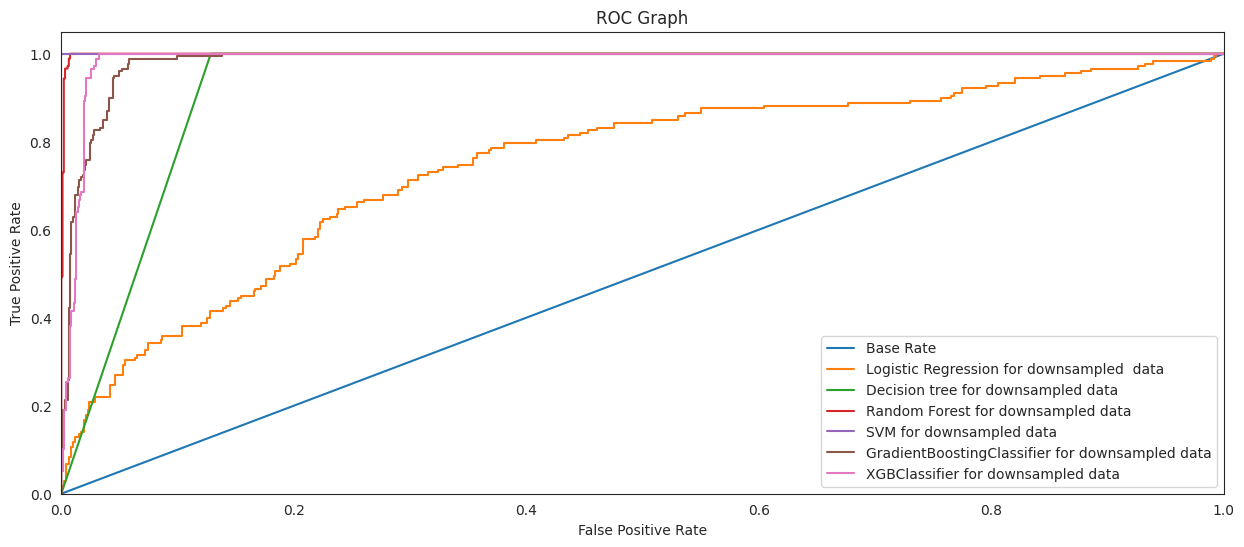

In [ ]:
plot_data(l_downsampled,X_test,Y_test)

Nous constatons que Logistic Regression est le modéle le moins bon sur les données downsampled,par contre Decision Tree ,Random Forest ,GBClassifier et XGBClassifier ont donné de  bons résultats , mais ils sont moins performants sur les downsampled data que sur les oversampled data

# ROC graph for oversampled data

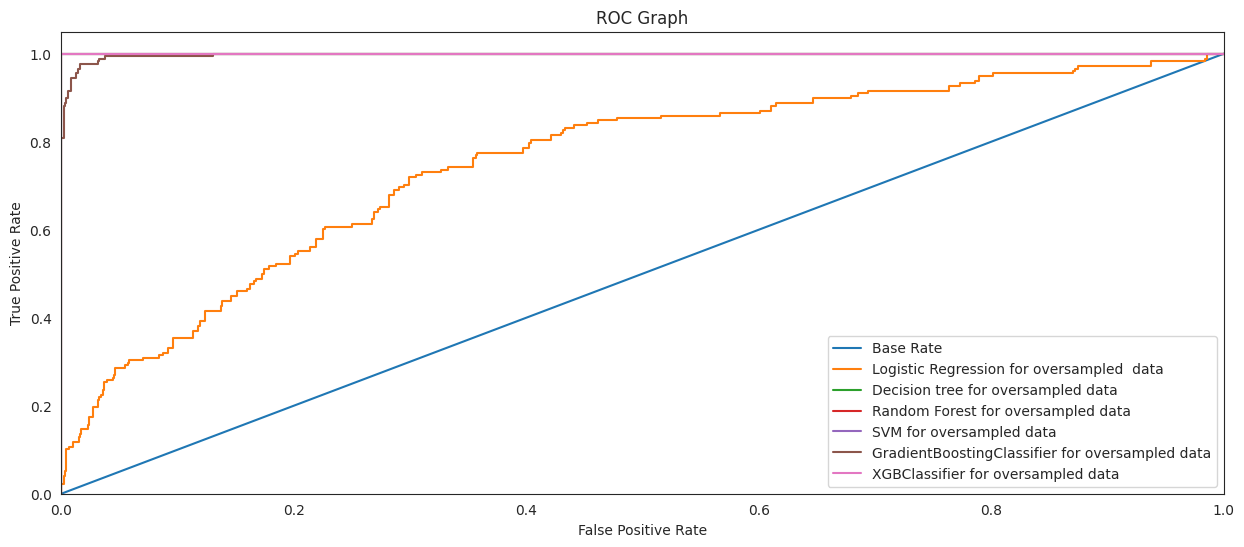

In [ ]:
plot_data(l_oversampled,X_test,Y_test)

Nous constatons que Logistic Regression est le modéle le moins bon sur les données oversampled ,par contre Decision Tree, Random Forest ,GBClassifier et XGBClassifier ont donné de trés bons résultats 

# ROC graph for unbalanced ,oversampled and downsampled data

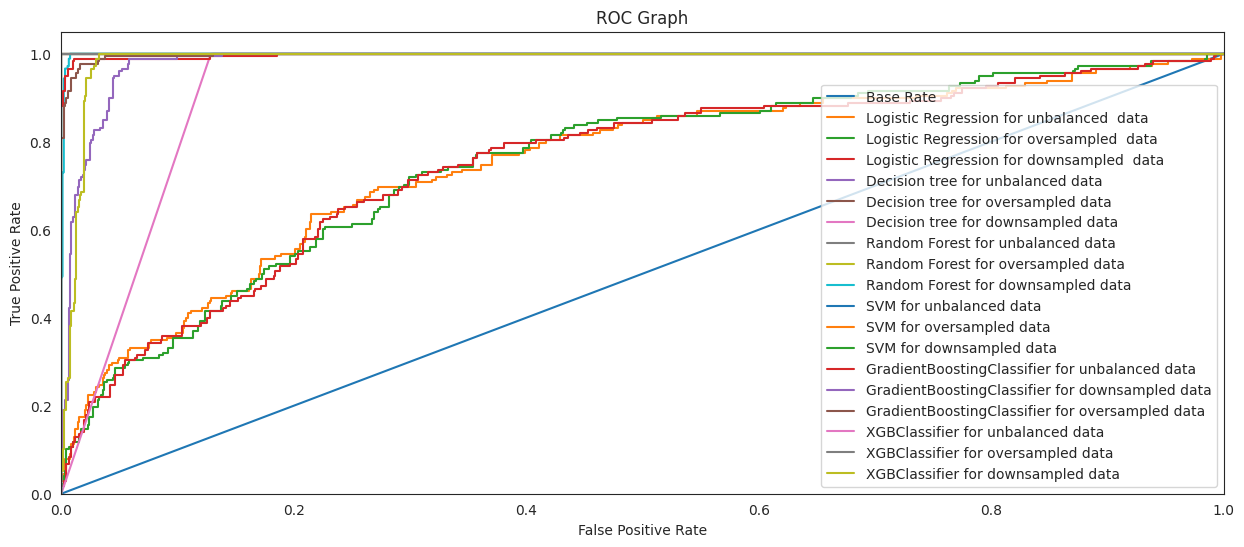

In [ ]:
plot_data(ll,X_test,Y_test)

# PCA + Logistic Regression

In [ ]:
a,b,c,dd,model = basic_classifier(LogisticRegression,best_params_lr,respcadf,df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     84.06           60      1.13        2.22


  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     63.02        25.65     68.05       37.14


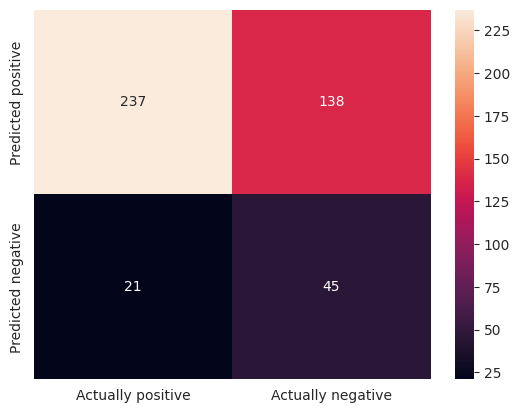

In [ ]:
a,b,c,dd,model =sampling_classifier(LogisticRegression,best_params_lr,respcadf,df_y,"upsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     61.36        24.61     67.97       36.04


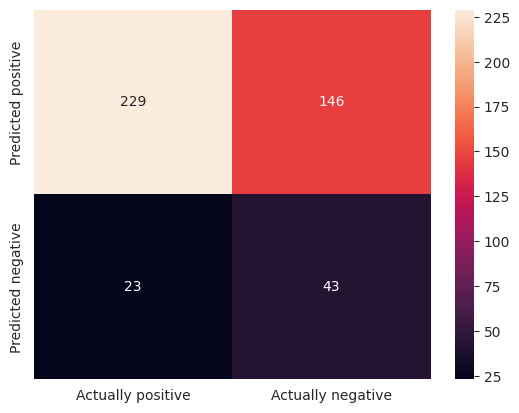

In [ ]:
a,b,c,dd,model=sampling_classifier(LogisticRegression,best_params_lr,respcadf,df_y,"downsample")

Le fait d'appliquer le modéle de logistic regression sur les données capturées par PCA n'as pas vraiment amélioré les scores.